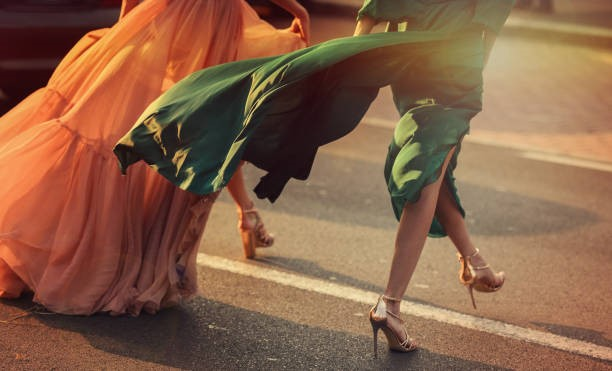




# <a id="1"></a>
<div style="text-align: left; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Table of Contents📜</h1>

</div>

- Part 0:  Project Introduction
- Part 1:  Exploratory Data Analysis (EDA) - non Text  
  - 1.1  [Import Files and Load Data](#3)
  - 1.2  [Basic Data Inspectations](#4)
  - 1.3  [Deeper Data Inspections and light cleaning](#5)
    - 1.3.1 [Missing and Duplicated Values](#6)
    - 1.3.2 [Dependent Variable Distribution](#7)
  - 1.4 [Data Visualization](#8)
    - 1.4.1 [Seperate Discrete and Continuous Features](#9)
    - 1.4.2 [Continuous Features](#10)
    - 1.4.3 [Discrete Features](#11)
- Part 2: Exploratory Data Analysis (EDA) - Text  
    - 2.1 [Train/Test Split](#12)
    - 2.2 [Message Length, Word Cloud, and Unique Words](#13)
    - 2.3 [NLP Meta Features](#14)
    - 2.4 [N Grams](#15)
- Part 3:  Data preprocessing
  - 3.1 [Text Preprocessing](#16)
  - 3.2 [Tokenize, Sequence, and Paddings](#18)
- Part 4: Model Building
  - 4.1: [Model 1 - Basic Sequential Model with Dense Layer and build-in embedding](#19)
  - 4.2: [Model 2 - Model 1 with Resampling](#20)
  - 4.3: [Model 3 - LSTM](#21)
  - 4.4: [Model 4 - LSTM with Glove Embedding](#22)
- Part 5: [Conclusion](#23)
- [References](#24)



​
Photo by [AGCreativeLab](https://www.istockphoto.com/portfolio/AGCreativeLab?mediatype=photography) from Unsplash.
​

# 
<div style="text-align: center; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 0: Project Introduction 👞</h1>

</div>

<div style="background-color:#f4f4f4; padding: 10px;">
<span style="font-size: larger; color: black">
    
    
### Dataset Overview 
The dataset originates from a Kaggle competition project. As mentioned in the [project data card description](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews),this dataset comes from a Women's Clothing E-Commerce platform and focuses on customer reviews. It includes nine additional features that provide a rich context for analyzing the text data from various perspectives. Since this is actual commercial data, it has been anonymized, and any mentions of the company's name in the reviews have been substituted with the term "retailer. This dataset has 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name. 


### Project Goals and Metrics 
- Project Goals:
  - Exploratory Data Analysis (EDA):
    - Conduct an in-depth analysis of the dataset to uncover insights about customer behavior and sales patterns. This analysis is not solely for building predictive models but aims to provide valuable business insights.
  - Predictive Modeling:
    - Develop models to predict whether a customer will recommend a product (represented by the "Recommended IND" field, which is binary: 0 for not recommended, 1 for recommended).
Focus exclusively on neural network and deep learning techniques for this predictive task.
    - Since the data is sort of small and imbalanced, we want to compare different models' performance on this dataset.

- Metrics:
  - Imbalanced Data Handling: Given the imbalance in the 'Recommended IND' field, with more customers recommending products, relying solely on accuracy would not provide a comprehensive evaluation of model performance.
  - Performance Metrics:
    - Precision: Measures the proportion of positive identifications that were actually correct.
    - Recall: Measures the proportion of actual positives that were correctly identified.
    - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
    - AUC (Area Under the Curve): Evaluates the model's ability to distinguish between classes.
    - Confusion Matrix: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives to assess the model's classification performance.

### Model Training Approach and highlights
I will try a few different types of models. For each type, I've already done some tuning on parameters such as number of epochs, drop out rate (if needed), number of layers, etc.
 - Model 1: start with a basic Sequential Model with some dense Layers. For embedding, we will use tf build-in embedding, which learn on training data.
 - Model 2: based on model 1, discover what resampling would do on Model 1 performance
 - Model 3: discover performance on a more complex LSTM model 
 - Model 4: discover adding Glove Embedding to LSTM would do to performance. Here, we won't use processed data since Glove embedding won't work well with lots of word pre-processing.


# 
<div style="text-align: center; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 1: Exploratory Data Analysis (EDA) - non Text 🎠
</h1>


In general, we analyze non-text and text data differently. So, we'll start by analyze non-text data first. For non-text data, we'll start with general light EDA that we might do for most projects and then do 'data-specific' EDA based on the natural of the data we have.

##### <a id="3"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.1: Import Files and Load Data</h2>
</div>

In [75]:
# Import files
import os
import numpy as np 
import pandas as pd 
import itertools
from scipy.stats import norm, skew, mode
import re
import gc
import string
import warnings 
import operator

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall

In [76]:
# read dataframe
df = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

#Find out number of rows & columns in data
print ('Number of (rows,columns): ' + str(df.shape) )

# take a look
df.head()

Number of (rows,columns): (23486, 11)


Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

##### <a id="4"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.2: Basic Data Inspections</h2>
</div>

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [78]:
df.describe(include='all')

Unnamed: 0   Clothing ID           Age     Title  \
count   23486.000000  23486.000000  23486.000000     19676   
unique           NaN           NaN           NaN     13993   
top              NaN           NaN           NaN  Love it!   
freq             NaN           NaN           NaN       136   
mean    11742.500000    918.118709     43.198544       NaN   
std      6779.968547    203.298980     12.279544       NaN   
min         0.000000      0.000000     18.000000       NaN   
25%      5871.250000    861.000000     34.000000       NaN   
50%     11742.500000    936.000000     41.000000       NaN   
75%     17613.750000   1078.000000     52.000000       NaN   
max     23485.000000   1205.000000     99.000000       NaN   

                                              Review Text        Rating  \
count                                               22641  23486.000000   
unique                                              22634           NaN   
top     Perfect fit and i've gotten so many compliment...           NaN   
freq                                                    3           NaN   
mean                                                  NaN      4.196032   
std                                                   NaN      1.110031   
min                                                   NaN      1.000000   
25%                                                   NaN      4.000000   
50%                                                   NaN      5.000000   
75%                                                   NaN      5.000000   
max                                                   NaN      5.000000   

        Recommended IND  Positive Feedback Count Division Name  \
count      23486.000000             23486.000000         23472   
unique              NaN                      NaN             3   
top                 NaN                      NaN       General   
freq                NaN                      NaN         13850   
mean           0.822362                 2.535936           NaN   
std            0.382216                 5.702202           NaN   
min            0.000000                 0.000000           NaN   
25%            1.000000                 0.000000           NaN   
50%            1.000000                 1.000000           NaN   
75%            1.000000                 3.000000           NaN   
max            1.000000               122.000000           NaN   

       Department Name Class Name  
count            23472      23472  
unique               6         20  
top               Tops    Dresses  
freq             10468       6319  
mean               NaN        NaN  
std                NaN        NaN  
min                NaN        NaN  
25%                NaN        NaN  
50%                NaN        NaN  
75%                NaN        NaN  
max                NaN        NaN

In [79]:
#checking for duplicated entries
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are no duplicted rows in this data


#### ✍️ Basic EDA observations 

- Dataset has **23486 rows and 11 columns**. 
- There are a few columns with missing values. All of them are "object" type:
     - Title                    19676 non-null  object
     - Review Text              22641 non-null  object
     - Division Name            23472 non-null  object
     - Department Name          23472 non-null  object
     - Class Name               23472 non-null  object 
- column "unamed" seems to be just row number, can be deleted.

##### <a id="5"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.3: Deeper Data Inspections and light cleaning </h2>
</div>

##### <a id="6"></a>

<div style="text-align: center; background-color: #c4bcb3; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.3.1: Missing and Duplicated Values</h2>
</div>

Checking and handling missing values are usually a must-do for most data cleaning. Checking duplicates is a good practice too. Let's do them next.

## Missing Values

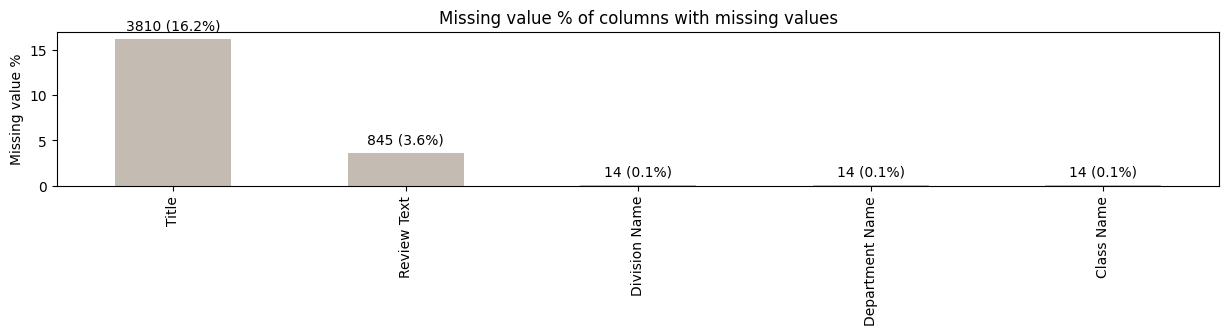

In [80]:
# missing value % and counts
col_with_missing = [c for c in df.columns if df[c].isnull().sum() >= 1]
missing_counts = df[col_with_missing].isnull().sum().sort_values(ascending=False)
total_rows = len(df)
missing_percentages = (missing_counts / total_rows) * 100

#plot
plt.figure(figsize=(15, 2))
ax = missing_percentages.plot.bar(color='#c4bcb3')

for i, (col, count) in enumerate(zip(missing_counts.index, missing_counts)):
    ax.text(i, missing_percentages[i] + 1, f"{count} ({missing_percentages[i]:.1f}%)", ha='center')

plt.ylabel("Missing value %")
plt.title("Missing value % of columns with missing values")
plt.show()

## Missing Values Handling Plan:
- All missing values happen in "object" types. There are several possible ways to deal with missing values in this case:
  -  Delete all rows with missing values.
      - Note "Title" column has a little above 15% of missing values. So, deleting those rows would shrink the data size a lot. 
  - Fill in missing values with something to indicate a missing values is filled. 

- However, for "Review Text", since I plan to do NLP mainly using this field, I can't just fill it with NA. There aren't many rows with missing values here, I will just them.

- For the rest of object columns with missing values, I will fill with a space.

In [81]:
# Delete rows with missing values in "Review Text"
print("Rows before deleting missing values in review text: ", df.shape[0])
df.dropna(subset=['Review Text'], inplace=True)
print("Rows after deleting missing values in review text: ", df.shape[0])

Rows before deleting missing values in review text:  23486
Rows after deleting missing values in review text:  22641


In [82]:
# Fill in missing values with blank for other object type columns
col_with_missing.remove('Review Text')
for c in col_with_missing:
    if c=='Title':
           df[c] =df[c].fillna(' ')
    else:
           df[c]=df[c].fillna('Blank')
                    
df.isna().sum().sum()

0

## Duplicated Values

As discussed in initial data inspection, column "unamed" seems to be just row number and can be deleted. Let's delete it before checking duplicates

In [83]:
# Drop "Unamed: 0" column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [84]:
# check duplicates
print(f"Rows with duplicates: {df.duplicated().sum()}")

Rows with duplicates: 1


There is only 1 duplicates, we can just drop it.

In [85]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(f"Rows in df after dropping duplicates: {df.shape[0]}")

Rows in df after dropping duplicates: 22640


##### <a id="7"></a>

<div style="text-align: center; background-color: #c4bcb3; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.3.2: Dependent Variable Distribution
    </h2>
</div>

We usually need to check to see if dependent variables is balanced or not, especially for classification problems. If they aren't balanced, we need to be more careful to choose the metrics for evaluation because some metrics aren't good to use for imbalancd data. Some metrics have trade-offs. 

## Portion of Recommend vs. Not Recommend by Dataset Rows

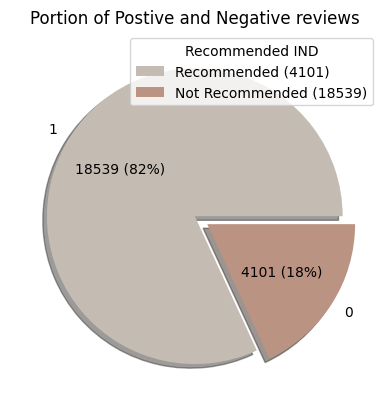

In [86]:
# Plot dependent variable distribution
# parameters for plot
sizes = df['Recommended IND'].value_counts()
labels = ["1", "0"]
explode = (0, 0.1)  #pull out second slice by 10%
colors = ['#c4bcb3', '#bb9383']  

# Pie chart 
plt.pie(x=sizes, labels=labels, explode=explode, shadow=True, autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(sizes) / 100, p), colors=colors)
plt.title('Portion of Postive and Negative reviews')
plt.legend(title="Recommended IND", loc="upper right", labels=[f"Recommended ({sizes[0]})", f"Not Recommended ({sizes[1]})"])
plt.show()



From the pie chart above, the response data is very imbalanced, and also the minority is the negative samples. This will create problem later for us to train the model. One way to fix it is using resampling method, which we add more minority classes.

## Portion of Recommend vs. Not Recommend by Each Cloth Items

We have above 22k of rows and each row is a review from a customer. A clothing item can get many reviews. How many clothing items are being reviewed in the dataset? And, what portion of them get 100% positive recommendation? What portion of them get other portions of positive recommendation (for example, 75%-99%, 50%-74%)? Let's find out.

In [87]:
# Check total Cloth items in dataset
print("Clothing Item Counts in dataset: ", len(df["Clothing ID"].unique()))

Clothing Item Counts in dataset:  1179


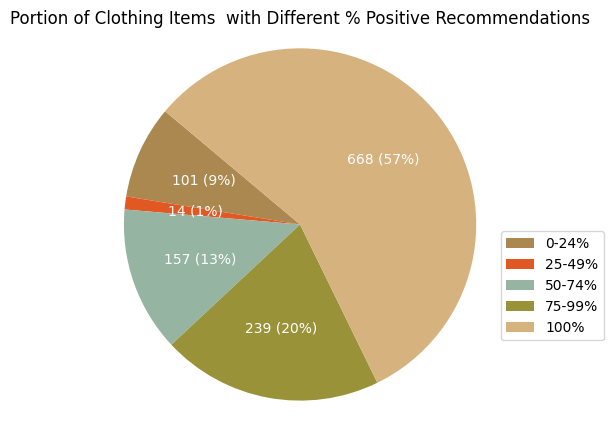

In [88]:
# Pie chart for % of positive recommendation for each of clothing item

# Calculate the percentage of positive feedback for each clothing item & Bin the data into specified ranges
positive_percentage = (df.groupby('Clothing ID')['Recommended IND'].mean() * 100)
bins = [0, 25, 50, 75, 99, 101]
labels = ['0-24%', '25-49%', '50-74%', '75-99%', '100%']
binned_percentage = pd.cut(positive_percentage, bins=bins, labels=labels, right=False)
colors=['#aa884f', '#e25822',  '#96b4a2', '#9a9238','#d6b27f']

# Proportion of items falling into each bin
percentage_counts = binned_percentage.value_counts(normalize=True) * 100
counts = binned_percentage.value_counts()
data = pd.DataFrame({'Percentage': percentage_counts, 'Count': counts})
data = data.reindex(labels)

# Pie Chart 
plt.figure(figsize=(5, 5))
plt.pie(data['Percentage'], labels=data.index, autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(data['Count']) / 100, p), colors=colors,textprops={'color': 'white'}, startangle=140)
plt.title('Portion of Clothing Items  with Different % Positive Recommendations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

So for example there are 57% of clothing items get 100% positive recommendation and 20% get 75%-99% positive recommendation. 



#### ✍️ Dependent Variable Observations

- Overall Distribution of Recommendations:

  - By rows or each customer reviews, 82% of recommendations are positive, while 18% are negative. The data is obvious imbalanced. We may need to do resampling later.
- Analysis by Clothing ID:
  - There are 1179 clothing items in the dataset.
  - Positive recommendation percentages vary for different clothing items. 
    - Lots of items (57%) have 100% positive recommendations.
    - In general, more portion of clothing items get higher % of positive recommendations.

##### <a id="8"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.4: Data Visualization</h2>
</div>

We usually visualize continuous and discrete (categorical and discrete numerical) data differently. So, we will seperate continuous, discrete, and text (which we will analyze in text EDA later) first. Then, visualize them seperately in general (there some bivariate or multivariate visualization analysis for interactions). 

##### <a id="9"></a>

<div style="text-align: center; background-color: #c4bcb3; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.4.1: Seperate Discrete, Continuous, and Text Features 
    </h2>
</div>

In [89]:
#Find continuous, discrete, and text features 
col_cont=[]
col_disc=[]
col_text=[]

for c in df.columns:  
    if (c in ['Review Text','Title']):
        col_text.append(c)
    elif (df[c].dtype=='object') or c=='Rating' or c=="Recommended IND":
        col_disc.append(c)
    else:
        col_cont.append(c)
        
#Take a look at features
print(f"Continuous features:\n {col_cont}")
print(f"Discrete features:\n {col_disc}")
print(f"Text features:\n {col_text}")

Continuous features:
 ['Clothing ID', 'Age', 'Positive Feedback Count']
Discrete features:
 ['Rating', 'Recommended IND', 'Division Name', 'Department Name', 'Class Name']
Text features:
 ['Title', 'Review Text']


##### <a id="10"></a>

<div style="text-align: center; background-color: #c4bcb3; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.4.2: Continuous Features
    </h2>
</div>

## Histograms for all Continuous Features

Histograms are usually good to use to see distributions for continous features. We'll do that with 'Recommended IND' and 'Division Name' in different colors stacked. 

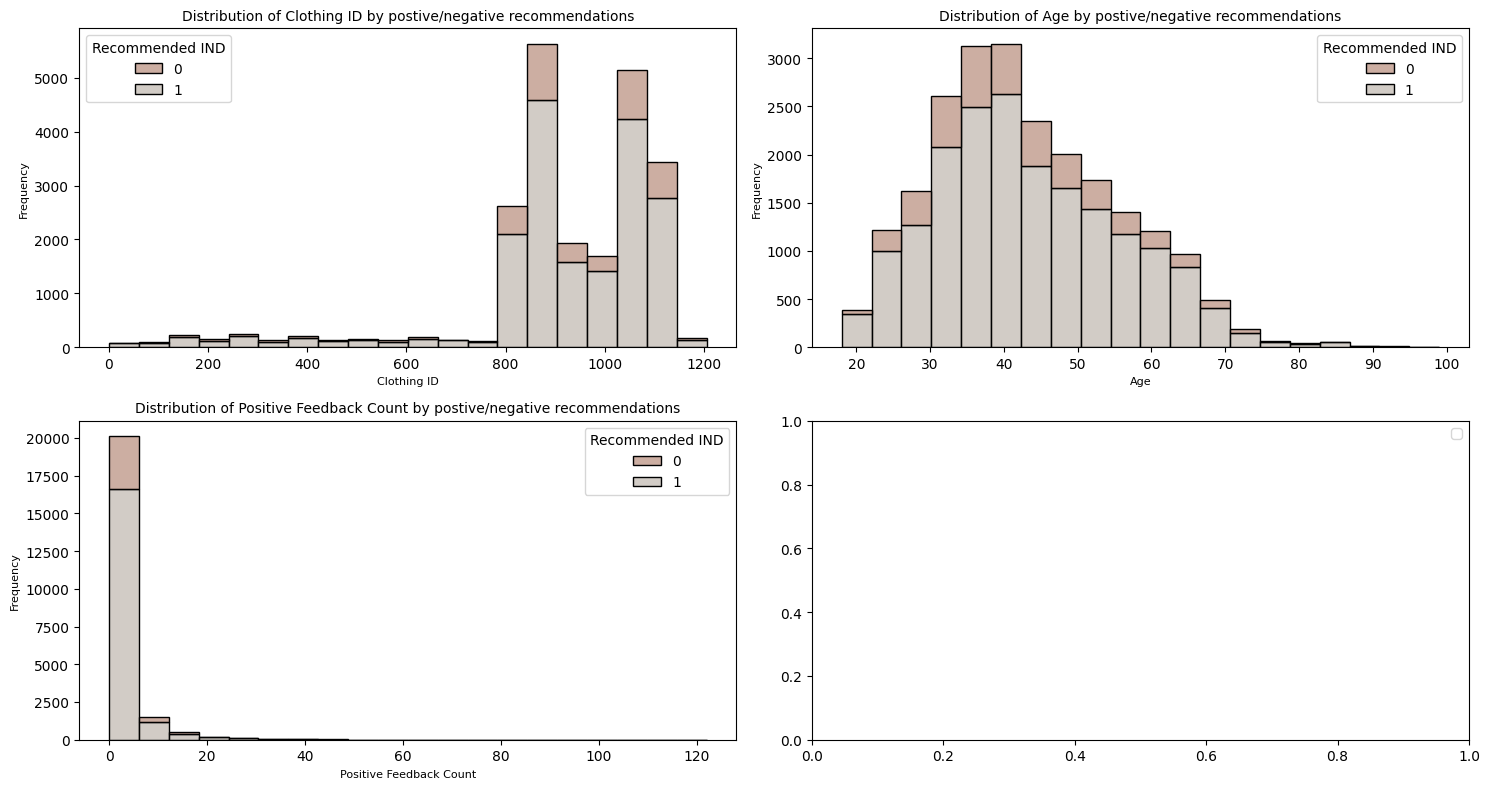

In [90]:
# Continuous Features - histogram by recommend ID
warnings.filterwarnings("ignore", category=FutureWarning)

# plot
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for idx, feature in enumerate(col_cont):
    row = idx // 2
    col = idx % 2
    
    sns.histplot(data=df, x=feature, hue='Recommended IND', bins=20, ax=ax[row, col], palette=[ '#bb9383', '#c4bcb3'], multiple='stack')
    plt.legend()
    ax[row, col].set_title(f'Distribution of {feature} by postive/negative recommendations',fontsize=10)
    ax[row, col].set_xlabel(feature, fontsize=8)
    ax[row, col].set_ylabel('Frequency', fontsize=8)
 
plt.tight_layout()
plt.show()

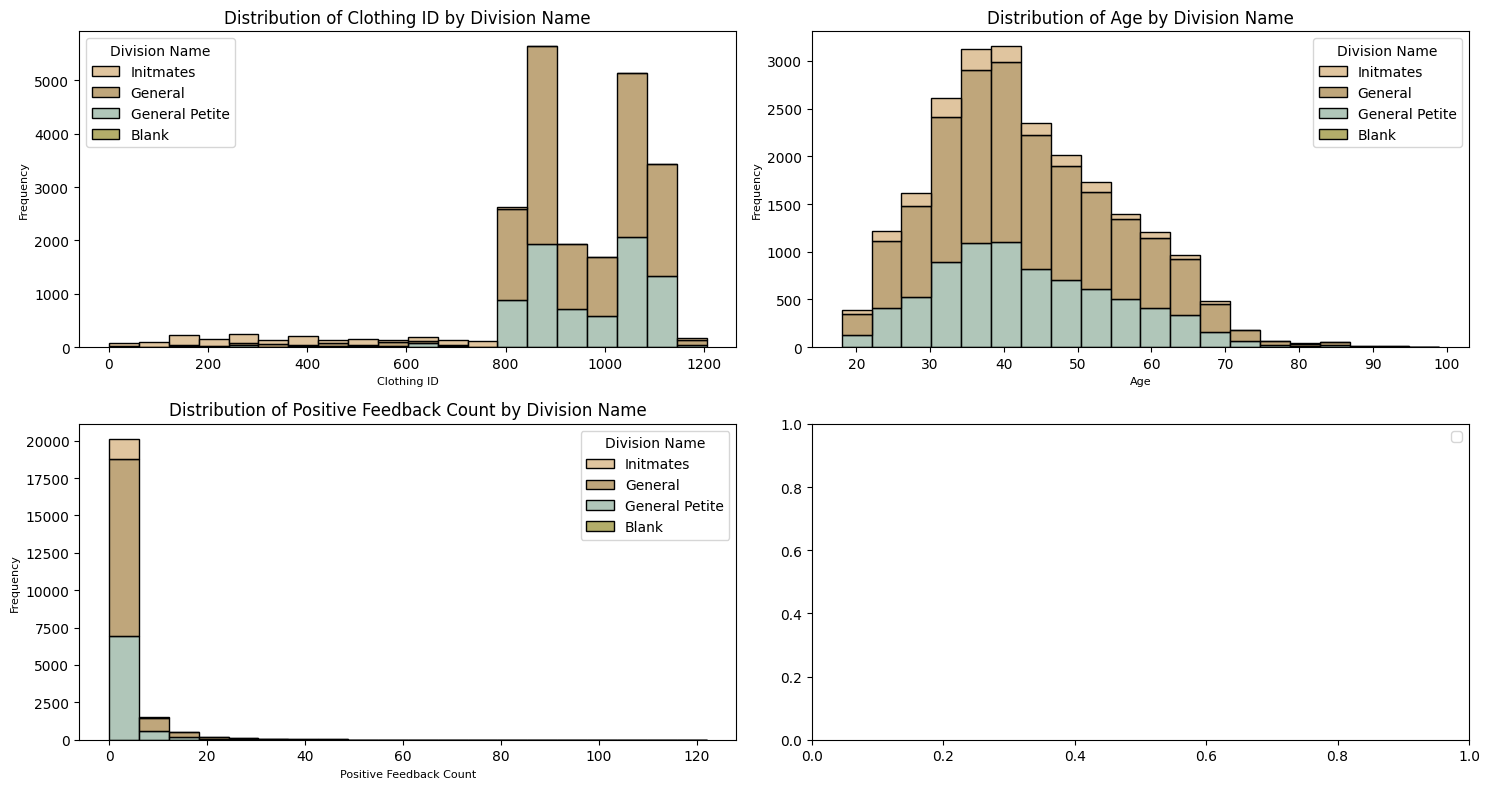

In [91]:
# Continuous Features - histogram by Division Name
warnings.filterwarnings("ignore", category=FutureWarning)

# plot
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for idx, feature in enumerate(col_cont):
    row = idx // 2
    col = idx % 2
    
    sns.histplot(data=df, x=feature, hue='Division Name', bins=20,ax=ax[row, col],palette= ['#d6b27f', '#aa884f', '#96b4a2', '#9a9238'],multiple='stack')
    plt.legend()
    ax[row, col].set_title(f'Distribution of {feature} by Division Name')
    ax[row, col].set_xlabel(feature, fontsize=8)
    ax[row, col].set_ylabel('Frequency', fontsize=8)
    
plt.legend()
plt.tight_layout()
plt.show()

#### ✍️ From histograms above, we can see a few things:
- Mostly 'Clothing ID'< 800 don't have popular items. There are less customer reviews on them. 
- Ages of customer peaks at range around 30-50 years old.
- Not lots of rows has any "Postive Feedback Count". Most of them are zero. This column probably isn't that helpful.

Let's take a look at division names for Clothing ID<800 vs. >800 next.Pie chart is good to check division portions.

## Pie Charts by Clothing ID<800 vs. ID>800

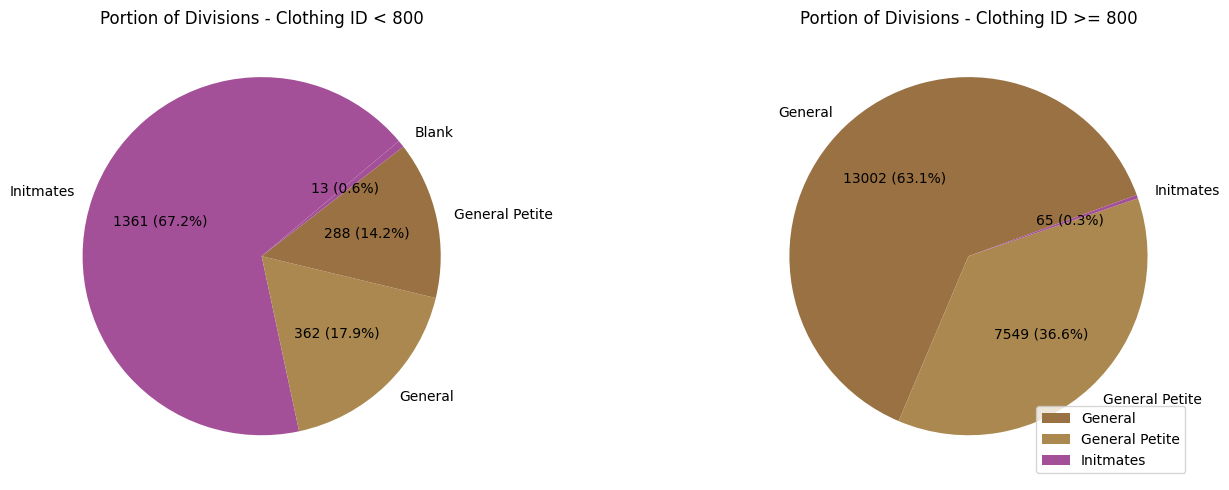

In [92]:
# Pie chart by Clothing ID <800 and >800
df_clothing_0 = df[df['Clothing ID'] < 800]
df_clothing_1 = df[df['Clothing ID'] >= 800]

colors_0=['#a35098', '#aa884f','#9a7142']
colors_1=['#9a7142', '#aa884f', '#a35098']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for clothing ID < 800
clothing_0 = df_clothing_0['Division Name'].value_counts()
ax[0].pie(clothing_0, labels=clothing_0.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(clothing_0) / 100, p), colors=colors_0, startangle=40)
ax[0].set_title('Portion of Divisions - Clothing ID < 800')
plt.legend()

# Pie chart for clothing ID >= 800
clothing_1 = df_clothing_1['Division Name'].value_counts()
ax[1].pie(clothing_1, labels=clothing_1.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(clothing_1) / 100, p),colors=colors_1, startangle=20)
ax[1].set_title('Portion of Divisions - Clothing ID >= 800')
plt.legend()

plt.tight_layout()
plt.show()


#### ✍️ Clothing ID <800 vs. >800 Division Name Observations:
- More than half of items with Clothing ID<800 are intimates (while for Clothing ID>800 there are very little intimates items). It makes sense they aren't too popular (get less reveiws)


##### <a id="11"></a>

<div style="text-align: center; background-color: #c4bcb3; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.4.3: Discrete Features
    </h2>
</div>

## Bar Plots for all Discrete Features
For continous feature distribution, histogram is usually good to use. Likewise, bar plots are usually good to see distribution for discrete variables. Let's plot bar plots for all discrete features first. We'll sort them in descending orders so we can see the popularity of each category under each discrete features.

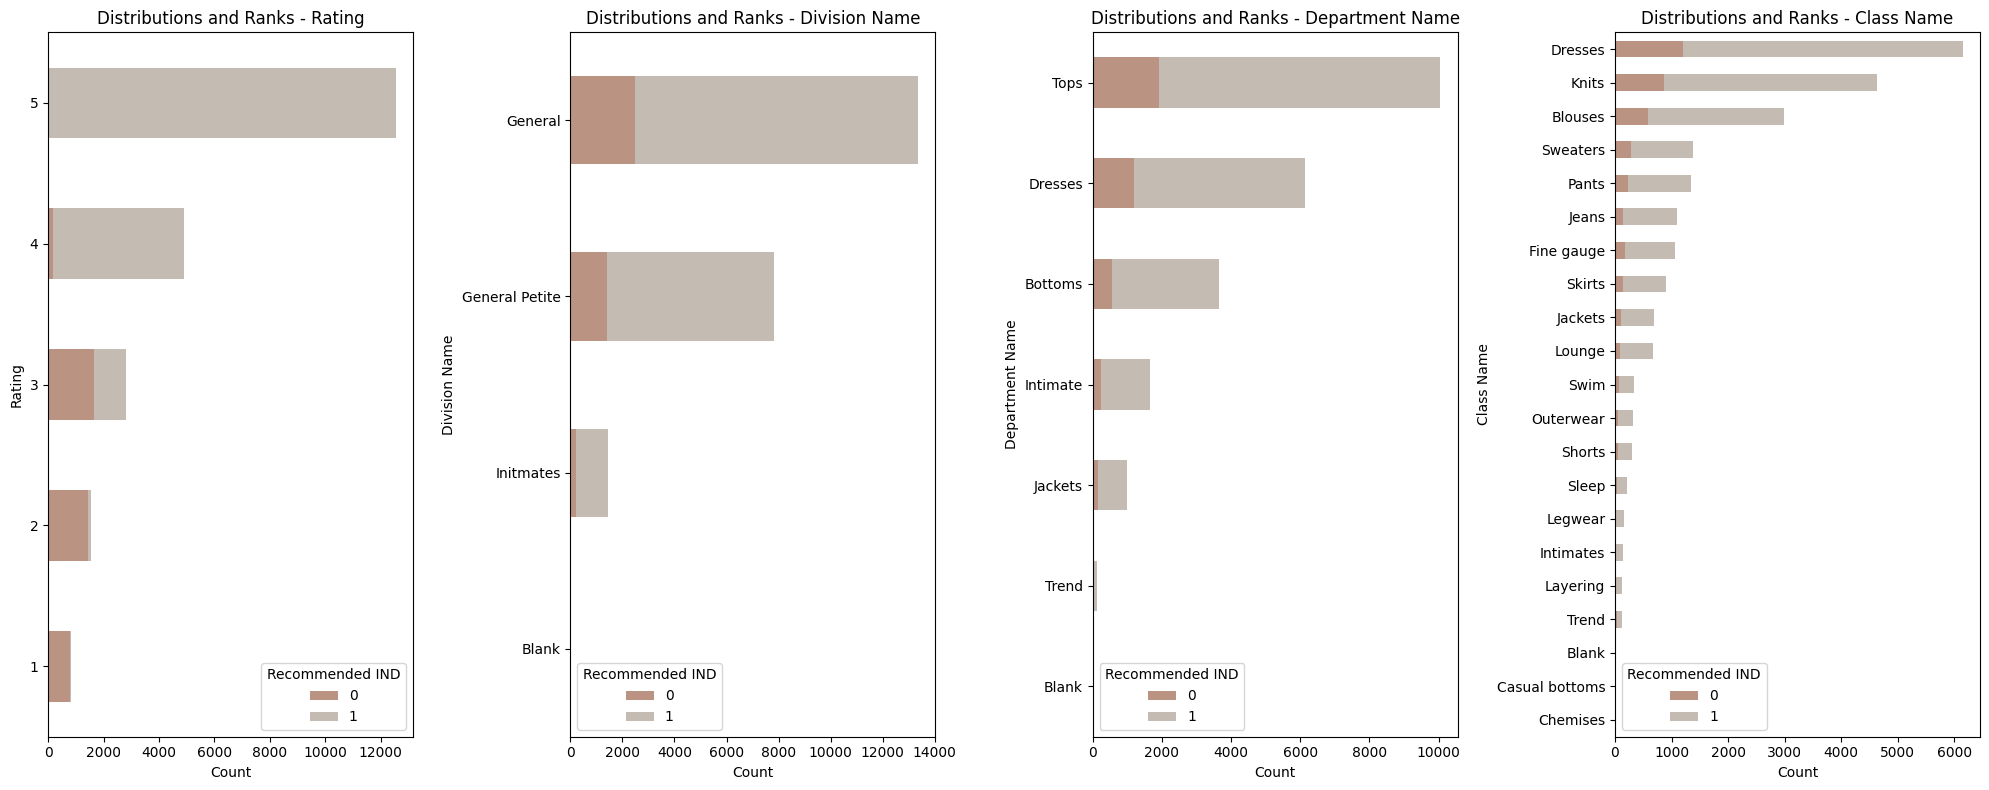

In [93]:
# bar plot for all discrete features - by recommended IND
fig, ax = plt.subplots(1, 4, figsize=(20, 8))  # Adjusted subplot layout to 1 row and 4 columns

cols = [c for c in col_disc if c != 'Recommended IND']

for count, feature in enumerate(cols, 0):
    if feature == 'Recommended IND':
        continue
    
    counts = df.groupby([feature, 'Recommended IND']).size().unstack(fill_value=0)
    counts = counts.loc[counts.sum(axis=1).sort_values(ascending=True).index]

    counts.plot(kind='barh', stacked=True, ax=ax[count], color=['#bb9383', '#c4bcb3'])  # Use barh for horizontal bar chart
    
    ax[count].set_xlabel("Count")  # Set xlabel to Count
    ax[count].set_ylabel(feature, fontsize='medium')  # Set ylabel to feature
    ax[count].set_title(f'Distributions and Ranks - {feature}')
    ax[count].tick_params(axis='y', labelrotation=0)  # Rotate y-axis labels horizontally

plt.tight_layout()
plt.show()


#### ✍️ Discrete Feature Distributions and Ranks Observations
- Rating: Rating of 5 is the most popular. This indicates a generally high level of satisfaction among the customers. Not bad!
- Division Name: The "General" division receives the most reviews. This isn't surprising as it likely encompasses a wide range of products.
- Department Name: Tops is most popular, the 2nd is dresses, and the third is the bottoms. A bit surprised that dress rank higher than the bottoms given that dresses are not typically everyday items for many people. The higher number of reviews could indicate that the fit and style of dresses are more critical to customers, warranting more feedback.
- Class Name: Again, dresses top the list, which reinforces the importance of dresses in this e-commerce platform. The prominence of dresses might indicate their higher value or the specific needs customers have regarding fit and appearance. This could be an important area for the business to investigate to improve customer satisfaction and optimize inventory.

## Pie Plots for Rating Portions under Recommend vs. Not Recommend Texts

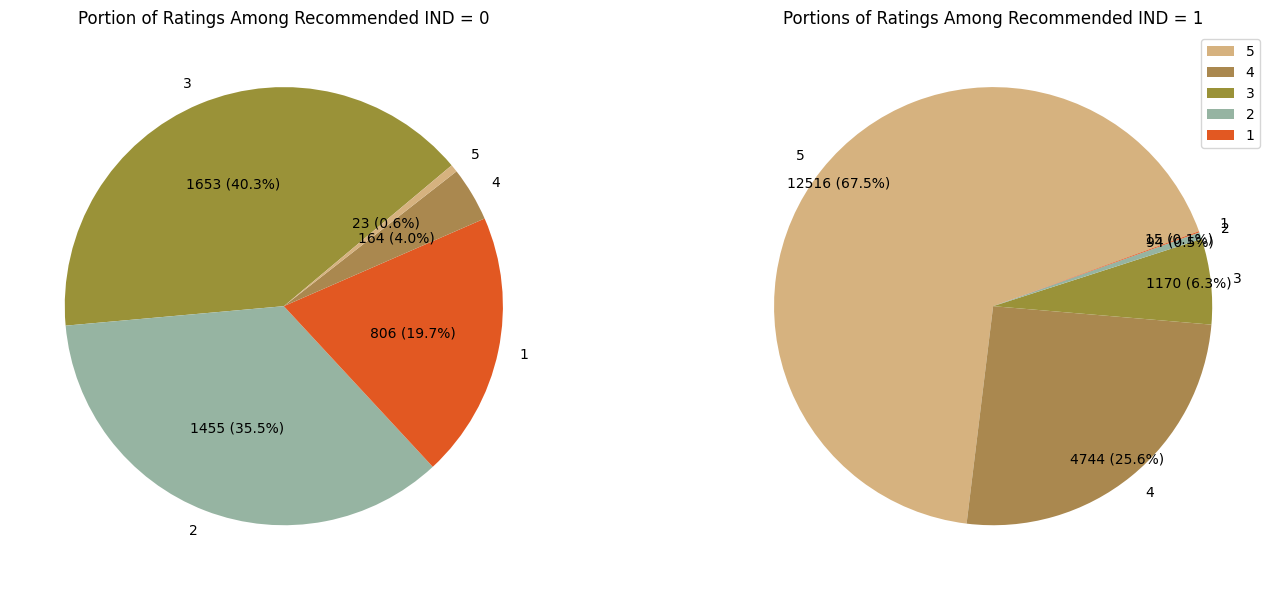

In [94]:
# Pie plot by Ratings
df_recommended_0 = df[df['Recommended IND'] == 0]
df_recommended_1 = df[df['Recommended IND'] == 1]
colors_0=['#9a9238', '#96b4a2', '#e25822', '#aa884f', '#d6b27f']
colors_1=['#d6b27f', '#aa884f', '#9a9238', '#96b4a2', '#e25822'] #order of 54321

# Create two subplots for the pie charts
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for Recommended IND = 0
sizes_0 = df_recommended_0['Rating'].value_counts()
ax[0].pie(sizes_0, labels=sizes_0.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes_0) / 100, p), colors=colors_0,startangle=40)
ax[0].set_title('Portion of Ratings Among Recommended IND = 0')

# Pie chart for Recommended IND = 1
sizes_1 = df_recommended_1['Rating'].value_counts()
ax[1].pie(sizes_1,labels=sizes_1.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes_1) / 100, p), colors=colors_1,startangle=20,pctdistance=0.9)
ax[1].set_title('Portions of Ratings Among Recommended IND = 1')
plt.legend()
plt.tight_layout()
plt.show()

#### ✍️ Recommendations vs. Ratings Observations
The pie charts above makes sense and are interesting:
- Recommended IND=0 chart:
   - As expected, customers who give a rating of 1 or 2 generally do not recommend the products.
   - A significant number of customers with a rating of 3 also do not recommend the products, indicating that a "middle" rating often translates to non-recommendation.
   - Interestingly, there are a few cases where customers give a rating of 4 or even 5 but still do not recommend the products. This discrepancy may warrant a deeper investigation to understand the underlying reasons.
- Recommended IND=1 chart:
  - It makes sense that most customers who recommend products give a rating of 4 or 5, reflecting high satisfaction.
  - However, there are some customers who, despite giving a rating of 1 to 3, still recommend the products. This could indicate a positive overall experience despite some product-specific issues or lower ratings for specific aspects

## Distributions and Population Ranks of Classes under Each Departments
Under each 'Department Name', there are different 'Class Name'. Let's take a look at distribution of Classes under each different Department Names. 

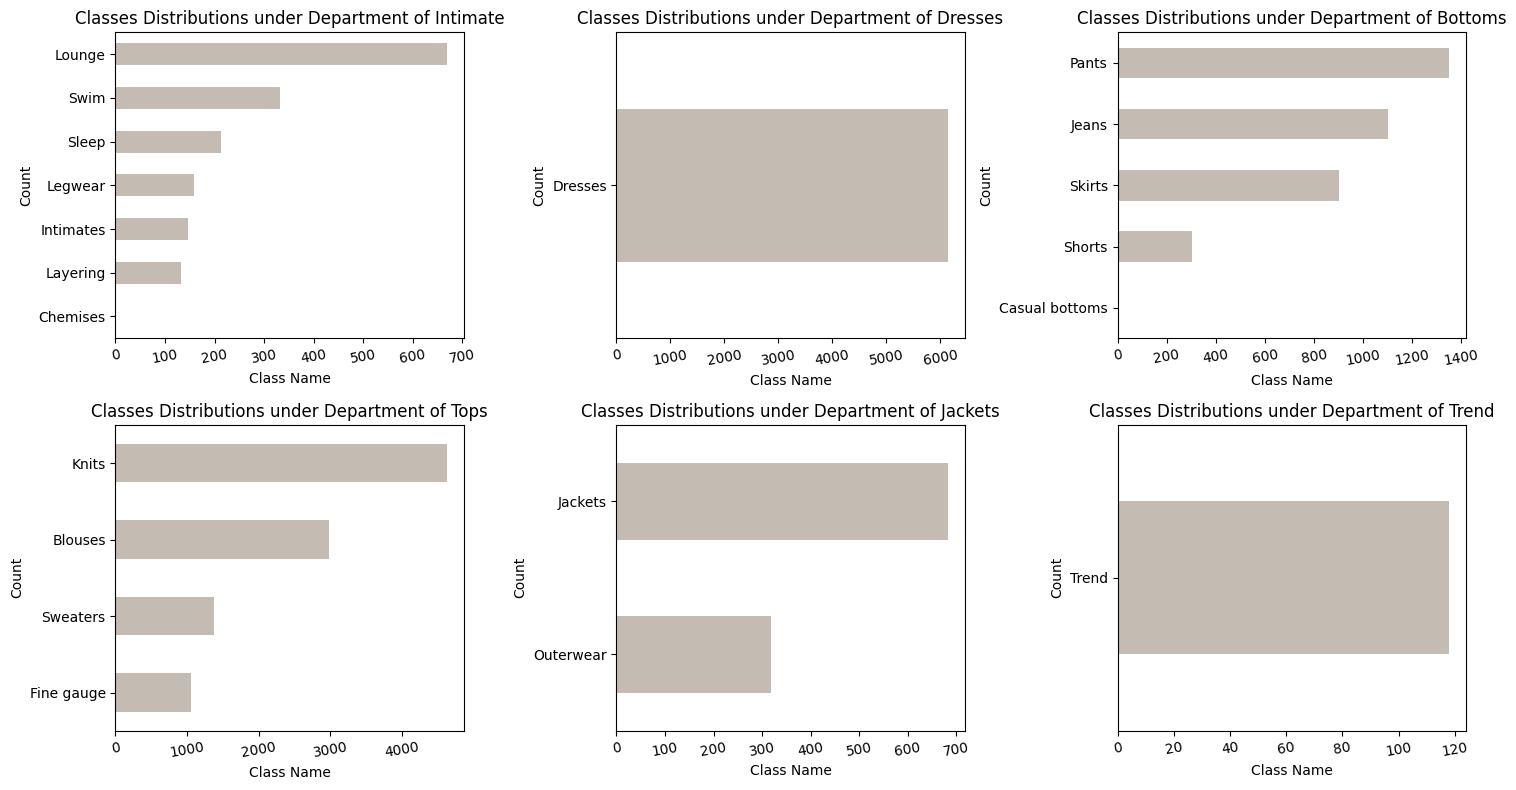

In [95]:
# Get unique department names
departments = df['Department Name'].unique()
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j < len(departments):
            department = departments[i * num_cols + j]
            department_data = df[df['Department Name'] == department]
            counts = department_data['Class Name'].value_counts().sort_values(ascending=True)
            counts.plot(kind='barh', ax=axes[i, j], color='#c4bcb3')

            axes[i, j].set_title(f'Classes Distributions under Department of {department}', fontsize=12)
            axes[i, j].set_xlabel('Class Name', fontsize=10)
            axes[i, j].set_ylabel('Count', fontsize=10)
            axes[i, j].tick_params(axis='x', rotation=10)
        else:
            # Hide empty subplots
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


#### ✍️ Popular Class Items under Each Department Observations:
- The charts above are straightforward yet valuable. They illustrate the ranking of popular class items within each department, offering critical insights for business inventory management. These insights can be crucial for optimizing stock levels, ensuring popular items are readily available, and enhancing overall customer satisfaction. Analyzing the popularity of specific classes within each department can help the business focus on high-demand items and improve inventory turnover.


# 
<div style="text-align: center; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 2: Exploratory Data Analysis (EDA) - Text 🧺
</h1>


##### <a id="12"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.1: Combine Text columns and Train/Test Split</h2>
</div>

## 'Title' Feature
- We have 2 text features in data. One is 'Title' and the other is "Review Text". Review Text are long and we'll sure to use it mainly for classification of 'Recommened IND' (1 or 0). For 'Title', we can either drop it or added it to 'Review Text'. Let's take a look at 'Title' first. 

- First, let's take a look at how many unique values in 'Title'. Sometimes, user are required to enter some specific choice of things only (as opposed to enter text freely). Although this is unlikely for 'Title' but let's check.

In [96]:
# unique "Title"
len(df.Title.unique())
print(df['Title'].head(10))

0                                        
1                                        
2                 Some major design flaws
3                        My favorite buy!
4                        Flattering shirt
5                 Not for the very petite
6                    Cagrcoal shimmer fun
7    Shimmer, surprisingly goes with lots
8                              Flattering
9                       Such a fun dress!
Name: Title, dtype: object


#### ✍️ "Title" Feature Observations:
A bit more than half of titles are not unique. So, it seems "Title" are arbitary - user can enter freeely. But 'Title' seems to have some dense infomation. So, I think it makes sense to append this to "Review Text".

### Append 'Title' to 'Review Text'

In [97]:
# Append 'Title' to 'Review Text'
df['Review Text'] = df.apply(lambda row: row['Review Text']  + ' ' + row['Title'], axis=1)

# Drop the "Title" column if it's no longer needed
df.drop(columns=['Title'], inplace=True)


## Train/Test Split

For text EDA, it's good to seperate and analye train and test set seperately. The reason is that we usually don't want to learn text in test set (at least the same way as for training set) during training. This is especially true when we do word embedding that need to learn from training sets. Also, we will want to check unique words in trainings vs. testing sets during EDA.

In [98]:
# Train/Test Split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(f"There are {train.shape[0]} rows in training data")
print(f"There are {test.shape[0]} rows in testing data")

There are 18112 rows in training data
There are 4528 rows in testing data


##### <a id="13"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.2 : Message Length, Word Cloud, and Unique Words</h2>
</div>

## Text Contents
First, to get a 'feel' of the text data, let's take a look at what the texts look like for postive vs. negativee recommendations.

In [99]:
# Look at texts
print('********************************Recommended texts********************************')
print(train[train['Recommended IND']== 1]['Review Text'].iloc[0],'\n')
print(train[train['Recommended IND']== 1]['Review Text'].iloc[100],'\n')
print(train[train['Recommended IND']== 1]['Review Text'].iloc[200],'\n')

print('********************************Not Recommended texts********************************')
print(train[train['Recommended IND']==0]['Review Text'].iloc[0],'\n')
print(train[train['Recommended IND']==0]['Review Text'].iloc[100],'\n')
print(train[train['Recommended IND']== 0]['Review Text'].iloc[200],'\n')

********************************Recommended texts********************************
I love this! the contrast in much prettier in person. Prettier in person 

I just received this in the mail today and haven't taken it off since! i feel like i should be in a romantic movie with a cute black dress under it. can definitely see myself getting a lot of use out of it. can not wait to wear it for the holidays! In love with this sweater coat! 

The pictures online do not do this justice. i did not even recognize it as the same dress at first. i went a size down and that way it flatters my curves beautifully instead of looking like a robe. it can actually be worn 3 ways- i like closing the closest snap(there's two) in the middle with a skinny belt over it, and a slip dress underneath. this way, the dress has a deep v neck and opens out in front when walking. think 1940's glam. it can also be fully closed like in the picture, or left ope Gorgeous in person 

********************************Not Re

## Message Lengths
Message lengths are important to look. It relates to how much the text can convey meanings. In general, the longer the text, the easier it can convey meanings. Also, we'll need to convert each texts to sequences and each sequences need to be the same length, checking text length distribution can give us some idea about the sequences length to use.

Negative "Message Length" skewness: -0.076229 and kurtosis: -1.182614
Positive "Message Length" skewness: -0.017245 and kurtosis: -1.250387


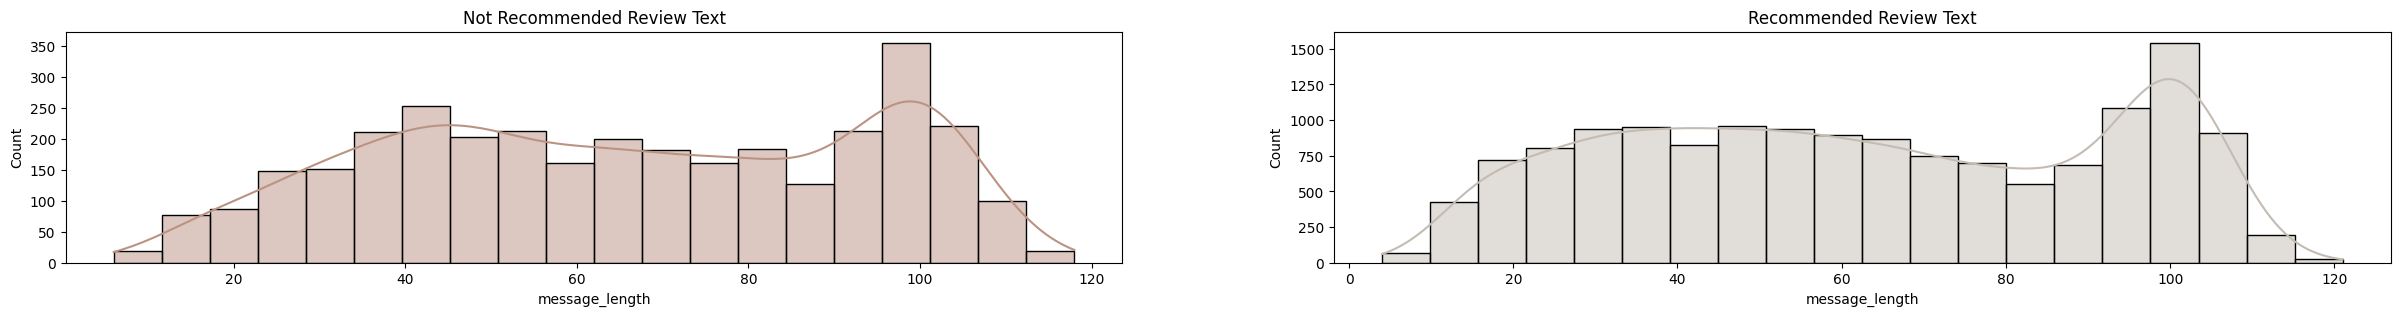

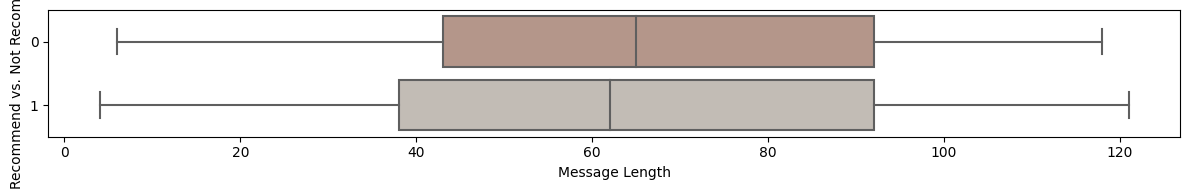

In [100]:
# Create 'message_length' field 
def plot_message_length(df):
        df_copy = df.copy()
        df_copy['message_length'] = df_copy['Review Text'].apply(lambda x: len(x.split(" ")))
        print("Negative \"Message Length\" skewness: %f and kurtosis: %f" % 
              (df_copy[df_copy['Recommended IND'] == 0]['message_length'].skew(), 
               df_copy[df_copy['Recommended IND'] == 0]['message_length'].kurt()))

        print("Positive \"Message Length\" skewness: %f and kurtosis: %f" % 
              (df_copy[df_copy['Recommended IND'] == 1]['message_length'].skew(), 
               df_copy[df_copy['Recommended IND'] == 1]['message_length'].kurt()))

        #Check distribution 
        plt.figure(figsize=(30,3))
        with pd.option_context('mode.use_inf_as_na', True):
            plt.subplot(1, 2, 1)
            sns.histplot(df_copy[df_copy['Recommended IND'] == 0]['message_length'], kde=True, bins=20, color='#bb9383')
            plt.title("Not Recommended Review Text")

            plt.subplot(1, 2, 2)
            sns.histplot(df_copy[df_copy['Recommended IND'] == 1]['message_length'], kde=True, bins=20, color= '#c4bcb3')
            plt.title("Recommended Review Text")
  
        plt.figure(figsize=(12, 2))
        sns.boxplot(data=df_copy, y='Recommended IND', x='message_length', palette={0: '#bb9383', 1: '#c4bcb3'}, orient= 'h')
        plt.xlabel('Message Length')
        plt.ylabel('Recommend vs. Not Recommend')
        
        plt.tight_layout()
        plt.show()
        
plot_message_length(train)

#### ✍️ Message lengths observations:
- The distribution of message lengths of positive vs. negative comments are quite similar, with majority around length of 40-90 words.

## Unique Words in Training vs. Testing Sets
- It's important to check unique words in training vs. testing. We'll need to do some word embedding before we can put text to model. For some word embedding, we learn embedding from training set. So, for those, if the words are in testing but aren't in training set, we won't be able to give those words "meanings'. Those would be out of vocabulary words (usually called 'OOV'). Lots of 'OOV' words usually aren't good for testing set performance.
- Also, checking 'OOV' in testing set can sometimes give us ideas about how to pre-processing text data.


Unique Words in training: 38227
Unique Words in testing: 16811
Unique Words in testing not in training: 4985
Unique Words in both testing and training: 41293


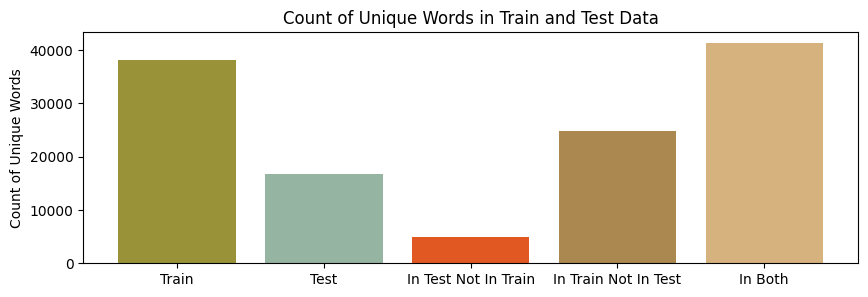

Some sample words in testing not in training:
 ['packagei', 'Nightbelle', 'points.', 'synthetic.the', 'heavens!!!', 'practice!', 'cheeky', 'arms?', '20-something', 'outfit.it', 'Sbags', 'small--5\'1"', 'good,just', 'me...overall,', 'mindful.', '10!!!!!!!!!!!!', 'green...i', 'work?).', 'boxy!!', 'beefier', 'sweater....it', 'person,..then', 'Supremely', 'innovative.', 'omits', 'add.', 'comfortbale,', 'rent', 'Treat', 'modal,', '65', '7%', 'white-dirty', 'girls..', 'olive/khaki', 'fabric.the', '"breezy"', 'thoroughly.', 'socal,', 'swing/loose', 'Matter', 'rial', '-tts', 'spring/fall,', '32b...and', 'd...the', 'factor,', 'balc', 'flawy', 'short...and', 'm?', 'blogger', 'chicks', 'smells).', "pomona's", 'Exquisite!', 'petite/athletic', '"looks"', 'All-in-all', 'available!)', 'instuctions', 'dye,', 'big??', 'die!', 'successfully.', 'inever', 'traveling)', 'strange--it', 'reallly', 'Finally--pants', 'keds', 'Softer', '220lbs', 'creations.', 'clack', 'enjoy.', 'it"...', '98%', 'fountain.', '(h

38227

In [101]:
# Unqiue words
def unique_words_train_test(col, n=600):
        # First let's check number of unique words in training and testing
        unique_words_train = len(train[col].str.split(" ").explode().unique())
        unique_words_test = len(test[col].str.split(" ").explode().unique())

        # Find words in test not in train
        unique_words_train_list = set(train[col].str.split().explode().unique())
        unique_words_test_list = set(test[col].str.split().explode().unique())
        words_in_test_not_train = list(unique_words_test_list.difference(unique_words_train_list))
        words_in_train_not_test = list(unique_words_train_list.difference(unique_words_test_list))
        words_in_both_train_and_test = list(unique_words_train_list.union(unique_words_test_list))
        
        # Some output
        print("Unique Words in training:", unique_words_train)
        print("Unique Words in testing:", unique_words_test)
        print("Unique Words in testing not in training:", len(words_in_test_not_train))
        print("Unique Words in both testing and training:", len(words_in_both_train_and_test))

        # plot
        plt.figure(figsize=(10,3))
        plt.bar(['Train', 'Test','In Test Not In Train','In Train Not In Test',"In Both"], [unique_words_train, unique_words_test, len(words_in_test_not_train), len(words_in_train_not_test), len(words_in_both_train_and_test)], 
                 color=['#9a9238', '#96b4a2', '#e25822', '#aa884f', '#d6b27f'])
        plt.title('Count of Unique Words in Train and Test Data')
        plt.ylabel('Count of Unique Words')
        plt.show()
        
        print("Some sample words in testing not in training:\n", words_in_test_not_train[:300])
        return unique_words_train
        
unique_words_train_test('Review Text')

#### ✍️ Words in testing but not in training observation:
- There are a little below 5000 words in testing but are not in training, which means word embedding won't recognize those 5000 words and would put them as out of vacabulary during testing. Those can cause some problem but it's a very common problem. 5000 words in this data isn't a huge amount though. 
- From the samples of testing words not in training, we can see lots of them are caused by punctuations. Removing them for embedding methods that need to learn from training data could be good.

##### <a id="14"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.3:  NLP Meta Features </h2>
</div>

<div style="background-color: #f4f4f4; padding: 10px;">
<span style="font-size: larger;">
    
#### Meta Features

In NLP, "Meta-features" are additional features or characteristics derived from the data that are used to augment the original dataset for analytical and modeling purposes. Inspired by this [notebook](https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert). We will create some 'Meta Features" and compare to see their distriubtions in recommended and not recommended review texts. Also,we'll look at their distributions in training vs. tesings set because the distribution discrepancy between training and testing can affect testing predictions:
- **word_count**: number of words in text
- **unique_word_count**: number of unique words in text
- **stop_word_count**: number of stop words in text
- **url_count**: number of urls in text
- **mean_word_length**: average character count in words
- **char_count**:number of characters in text
- **punctuation_count**: number of punctuations in text


In [102]:
#sourcr code from https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert
# word_count
train['word_count'] = train['Review Text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['Review Text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['unique_word_count'] = train['Review Text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['Review Text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
stop_words = nltk.corpus.stopwords.words('english')
train['stop_word_count'] = train['Review Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
test['stop_word_count'] = test['Review Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# mean_word_length
train['mean_word_length'] = train['Review Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['Review Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train['char_count'] = train['Review Text'].apply(lambda x: len(str(x)))
test['char_count'] = test['Review Text'].apply(lambda x: len(str(x)))

# punctuation_count
train['punctuation_count'] = train['Review Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test['punctuation_count'] = test['Review Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


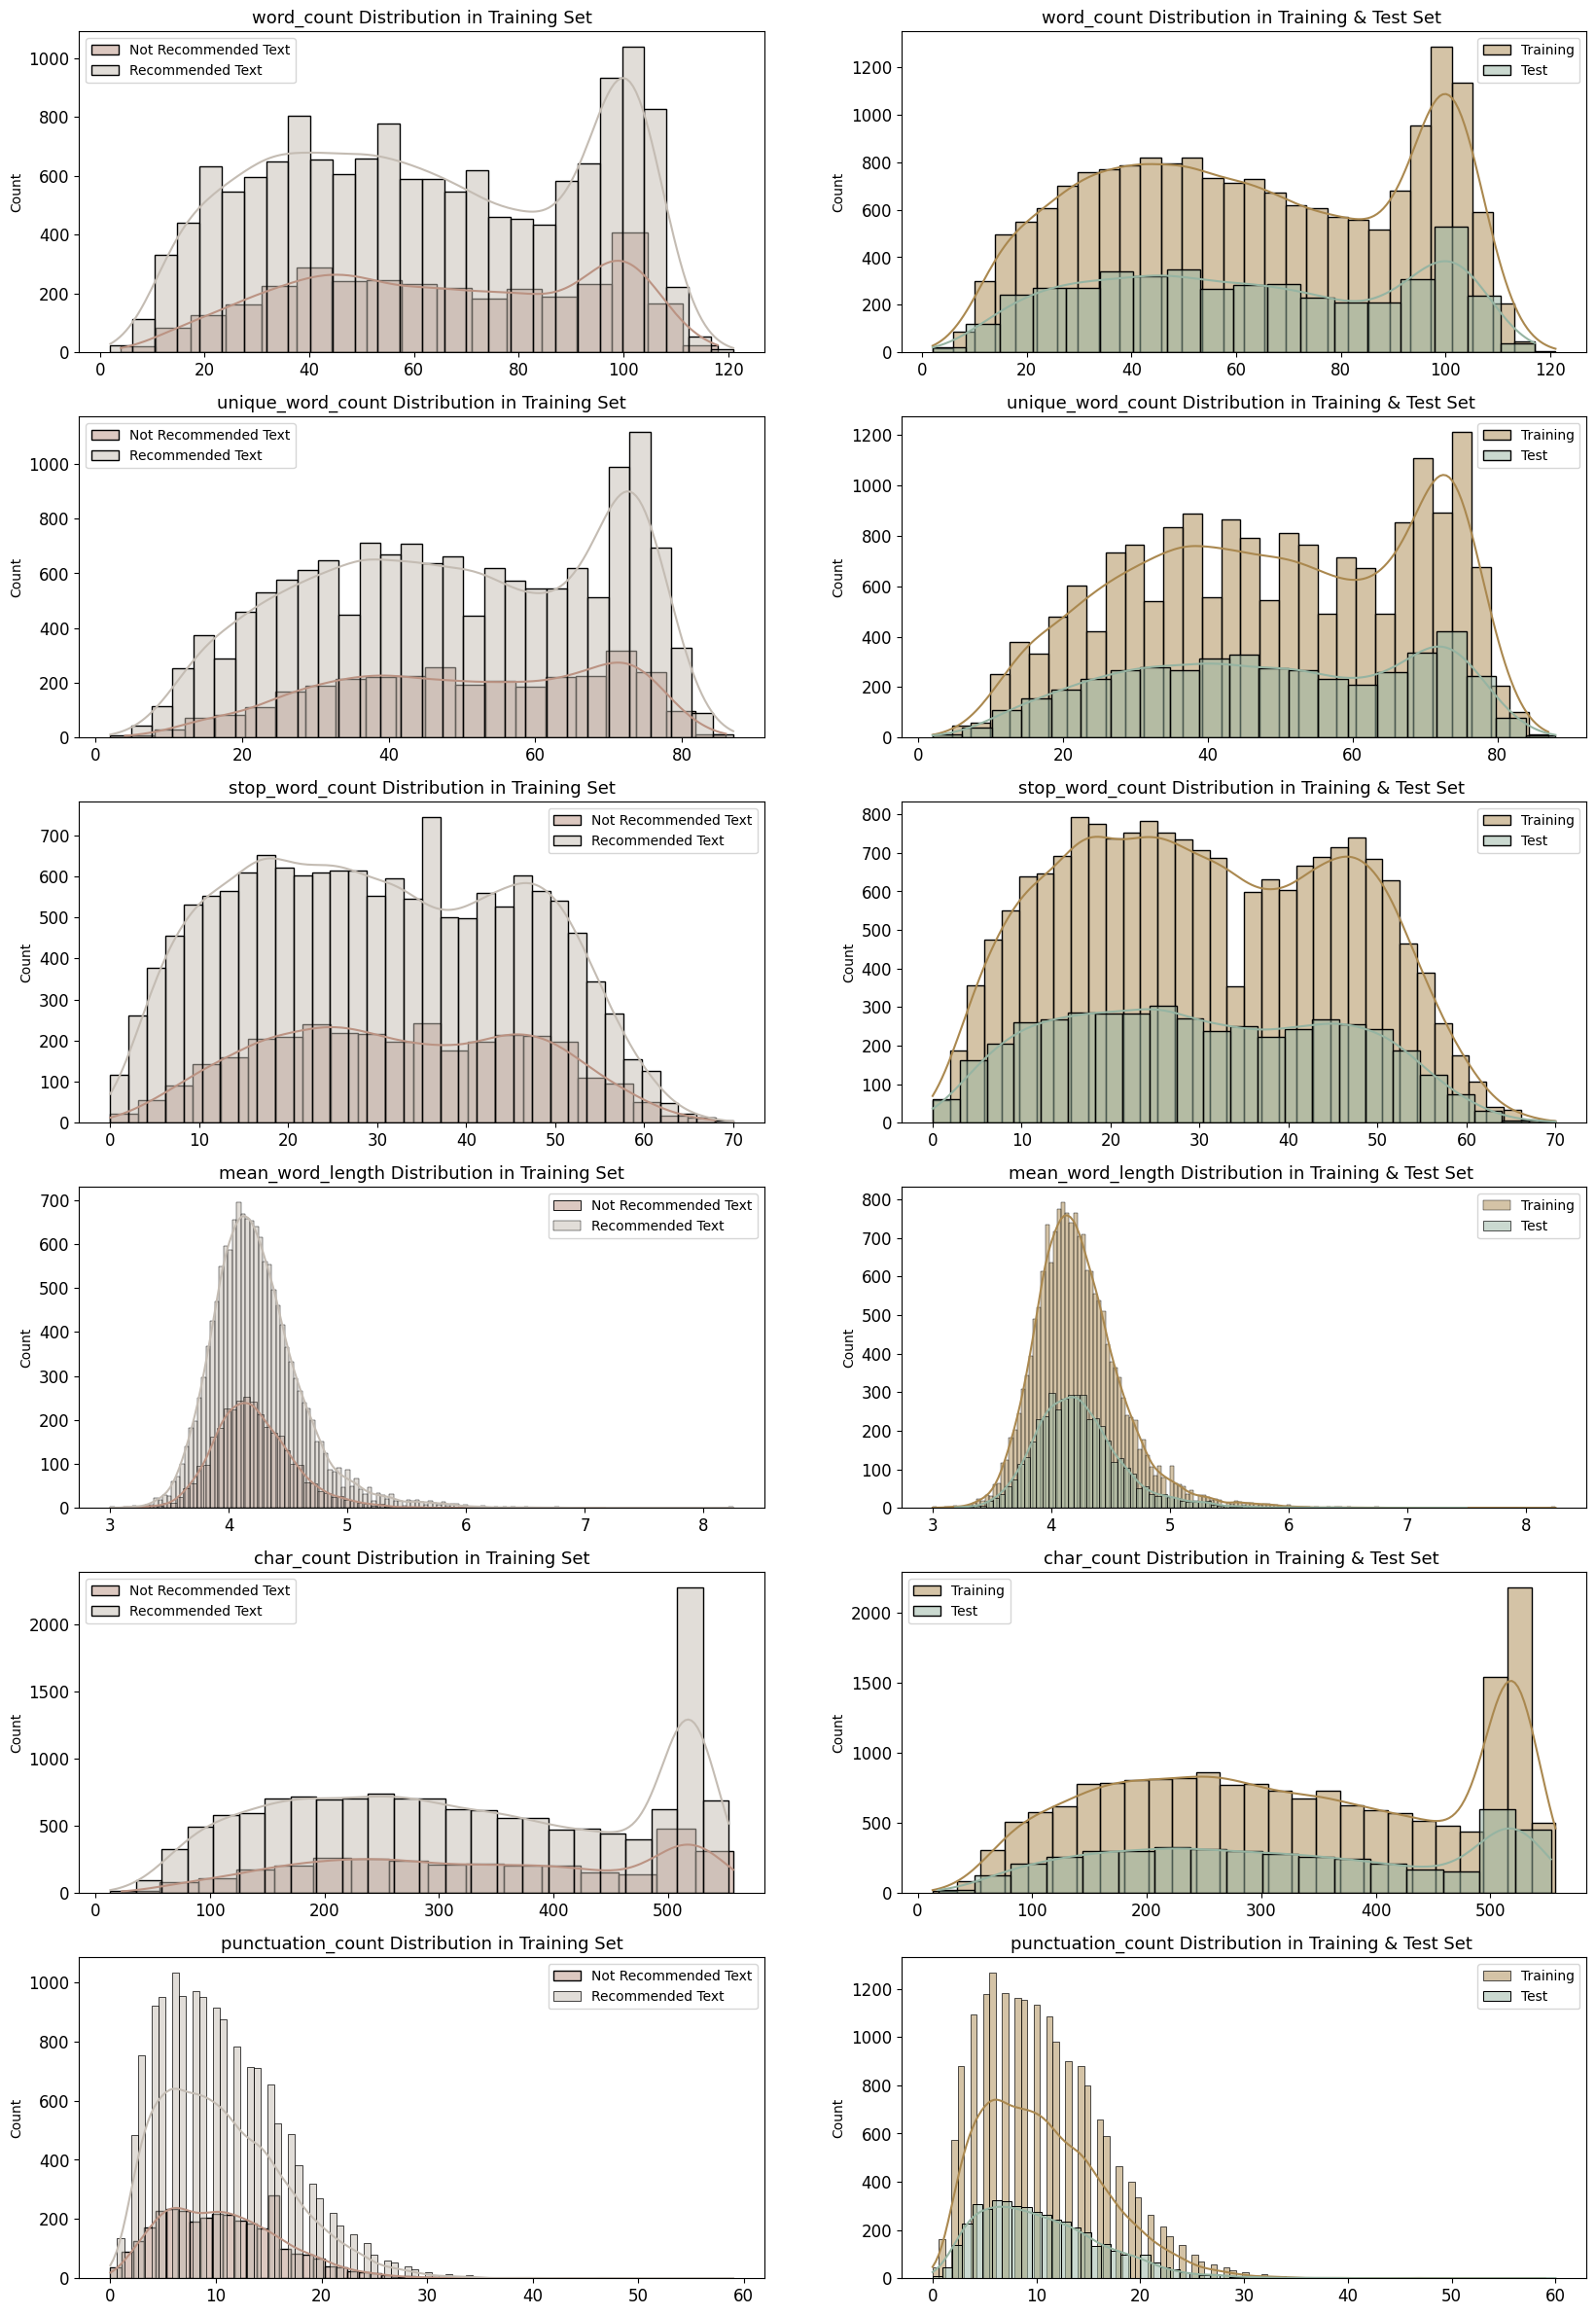

In [103]:
# Source code https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

# histograms for Meta-Features

warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning) # Suppress FutureWarning


METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count',  'mean_word_length',
                'char_count', 'punctuation_count']
RECOMMENDED = train['Recommended IND'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 30), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.histplot(train.loc[~RECOMMENDED][feature], label='Not Recommended Text', ax=axes[i][0], color='#bb9383', kde=True)
    sns.histplot(train.loc[RECOMMENDED][feature], label='Recommended Text', ax=axes[i][0], color='#c4bcb3', kde=True)
    sns.histplot(train[feature], label='Training', ax=axes[i][1], color='#aa884f', kde=True)
    sns.histplot(test[feature], label='Test', ax=axes[i][1], color='#96b4a2', kde=True)
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Distribution in Training & Test Set ', fontsize=13)

plt.show()

#### ✍️Meta Feature observations:
- Overall, the distriubtion of positive recommendation vs. negative are quite similar. This is also true for training vs. testing datasets.
- For meta feature 'word_count', it seems recommend text reviews has slightly more long length (around length of 100 range) then not recommended text. This suggest customer are slightly more likely to write long text reviews for items they recommend than for items they don't recommend. This is true for 'unique_word_count' too, which basically suggest the same thing.
- For meta feature 'char_count', it seems recommend words used in recommended text reviews are more likely to have more longer characters than words used in unrecommended text reviews. This suggest customer are slightly more likely to use longer length words (or complex) words in their reviews when they recommend an item vs. not.

##### <a id="15"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.4:  N Grams </h2>
</div>

Words have different meanings in different of combinations with other words. Checking n-grams can help us understand them better.

In [104]:
# function for n-grams
def ngram_freqplot(df, color='skyblue', target=" "):
    fig, axs = plt.subplots(1, 4, figsize=(20,10))  
    for i in range(1, 5):
        # Use CountVectorizer to get ngram
        vectorizer = CountVectorizer(ngram_range=(i, i), stop_words='english')
        ngram_train = vectorizer.fit_transform(df['Review Text'])

        # Calculate the frequency of each n-gram and store in dictionary 
        ngram_freq = ngram_train.sum(axis=0)
        feature_names = vectorizer.get_feature_names_out()
        ngram_dict = {feature_names[j]: ngram_freq[0, j] for j in range(len(feature_names))}
        
        # Filter out n-grams containing URLs
        ngram_dict = {ngram: freq for ngram, freq in ngram_dict.items() if not re.match(r'(http|https)', ngram)}
        
        sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)

        # top n-grams 
        top_n = 30  # Adjust the number of top n-grams you want to plot
        top_ngrams = [item[0] for item in sorted_ngrams[:top_n]]
        top_frequencies = [item[1] for item in sorted_ngrams[:top_n]]

        # bar plot
        axs[i-1].barh(top_ngrams, top_frequencies, color=color)
        axs[i-1].set_title(f'{target} tweet top 30 {i}-gram ')
        axs[i-1].invert_yaxis()  # want highest frequency at the top
        axs[i-1].tick_params(axis='x') 

        # font size for the words 
        for tick in axs[i-1].get_yticklabels():
            tick.set_fontsize(15)
    plt.tight_layout()

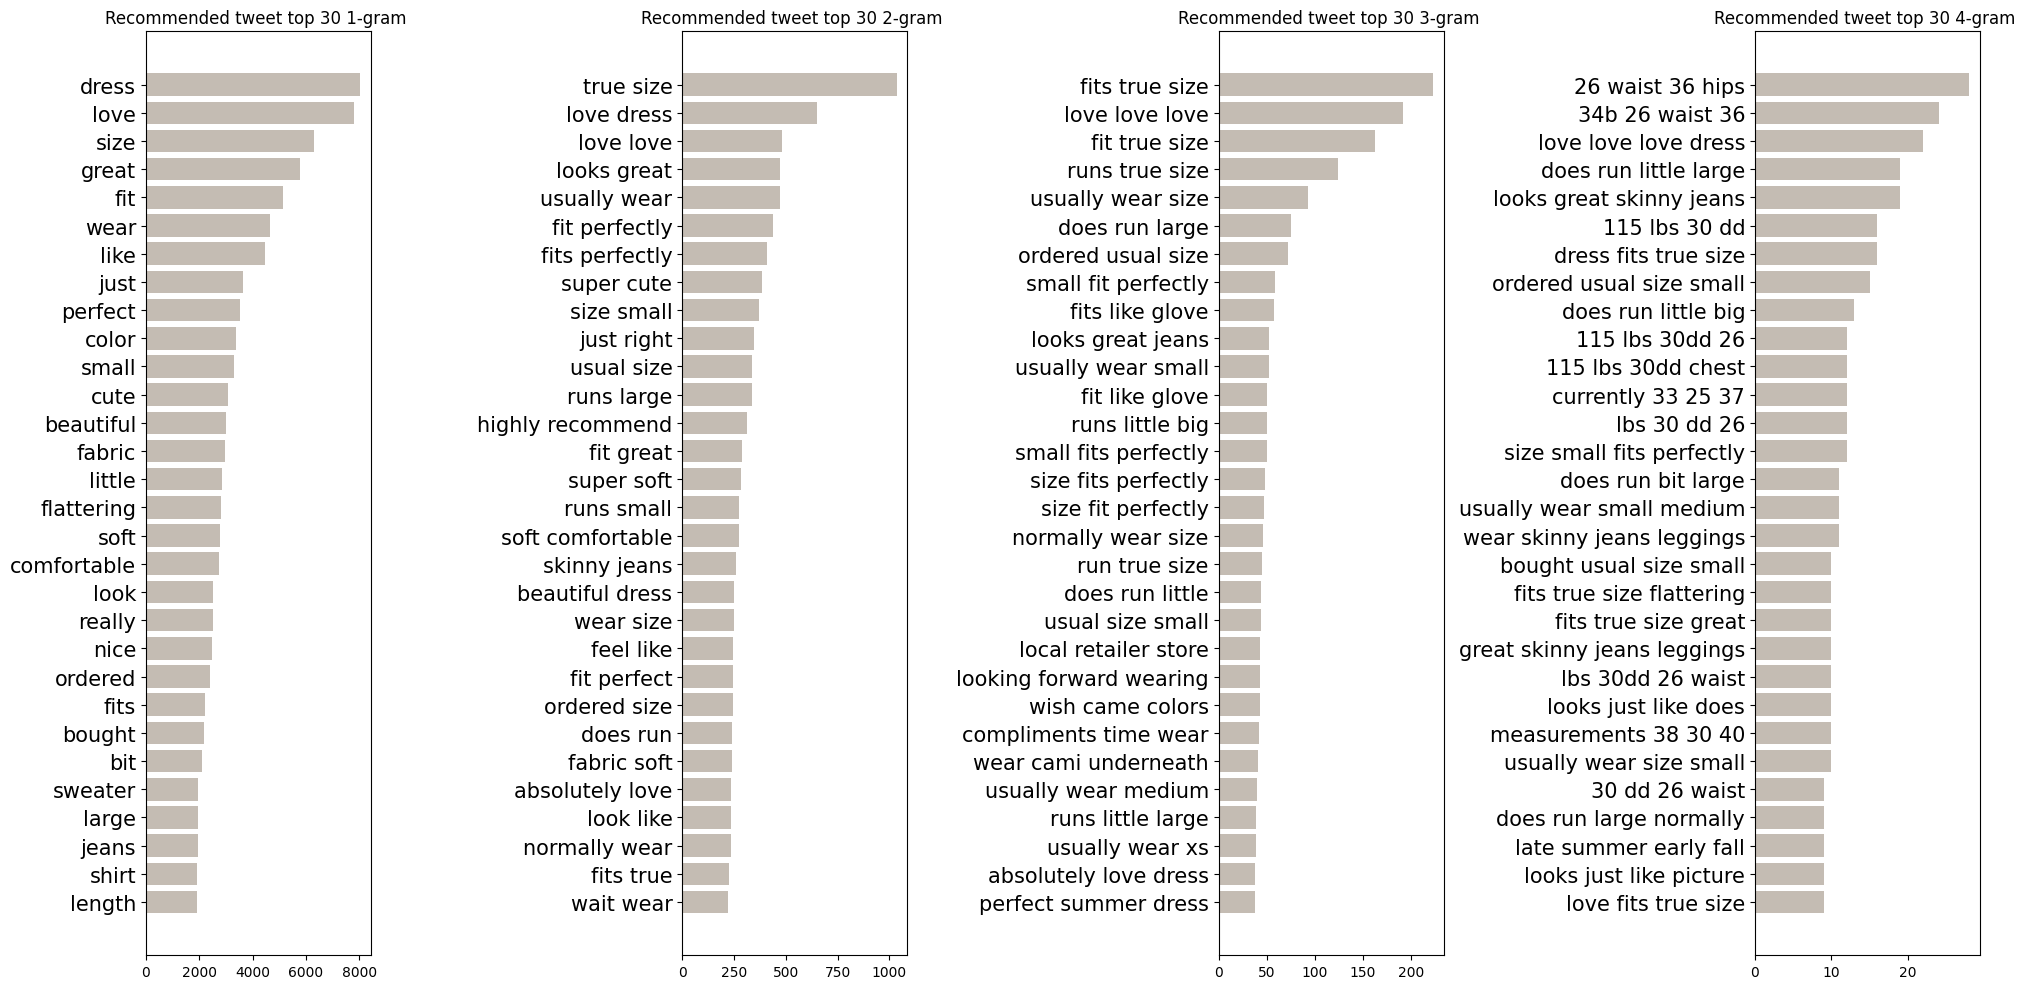

In [105]:
# Recommended Text
ngram_freqplot(train[train['Recommended IND']==1], color='#c4bcb3', target="Recommended")

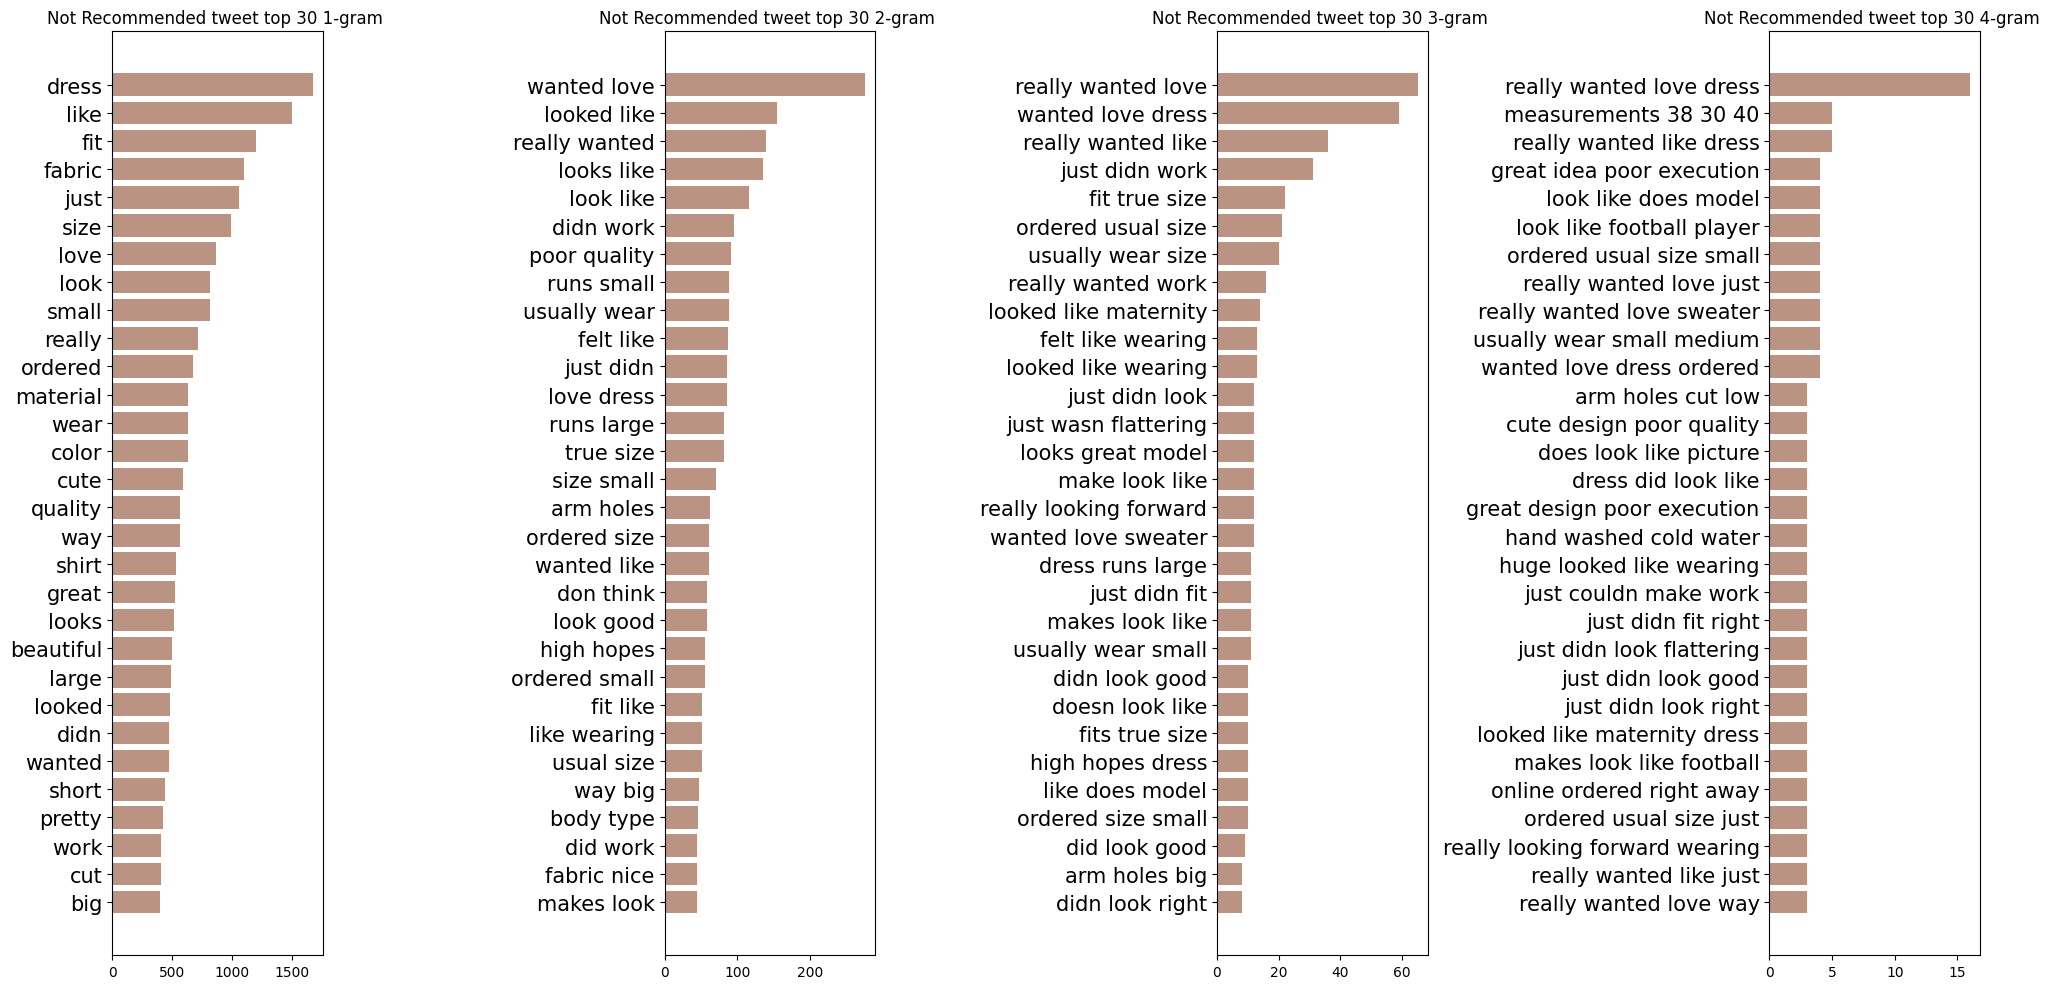

In [106]:
# Not Recommended Text
ngram_freqplot(train[train['Recommended IND']==0], color='#bb9383', target="Not Recommended")

#### ✍️ N-grams observations: 
- Some related recommended vs. not recommended unigram and bigram. For example,'love', 'looks great', 'love love love', 'fit true size', 'fit like glove' are frequent in recommended review texts. While in not recommended texts, the frequent words are 'ordered small',;didn look right','runs sizes small'.  
- However, many frequent words in recommended and not recommended texts don't seem to be helpful. For example, 'dress','like', 'love' are frequent in both kinds of tweets.
- 4-grams don't look necessary, 3-grams seems to be most helpful.

# 
<div style="text-align: center; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 3: Data Preprocessing 🧸
</h1>


##### <a id="16"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.1:  Text Pre-processing </h2>
</div>


<div style="background-color:#f4f4f4; padding: 10px;">
<span style="font-size: larger; color: black">
    
    
## Text Pre-processing (not for Glove Embedding):
We'll perform some text pre-processing. Note for later Glove Embedding, we won't do those. Glove Embedding doesn't work well with traditional text pre-processing. Here is a [good article about it](https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-for-glove-part1-eda).
- Lower cases: We don't want treat upper and lower case differently. So, usually we make all words lower case.
    
- Punctuations: Punctuation can sometimes be helpful. For example, a period "." can indicate the end of a sentence in sequential NLP models. For non-sequence models, we might not need them. 
    
- Numbers: Numbers would be treated as different "words" so it could add many more dimensions and cause overfitting. I think for out review texts, the numbers don't really help to predict if a review is positive or not.
    
- Stop words: Lots of English word don't convey meanings. (For example, 'such', 'that', 'the', 'their', 'then', 'there', and'these'.) We'll remove them.
 
- Stemming: To illustrate, the word 'game','games','gaming'are essentially the same. We don't want to treat them differently. Stemming help to deal with situations like this by those similar words to the same one.
    
- Extra spaces: Words with extra spaces sometime would be considered to be different words, removing them could help with word embeddings.

In [107]:
def text_preprocessing(text):
    # convert to lower case
    text = text.str.lower()
    
    # Remove punctuation 
    text = text.apply(lambda doc: re.sub(r'[^\w\s]', '', doc))
    
    # Remove numbers
    text = text.apply(lambda doc: re.sub(r'\d+', '', doc))

    # remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    text = text.apply(lambda doc: ' '.join([word for word in doc.split() if word not in stop_words]))

    # stemming
    porter_stemmer = PorterStemmer()
    text = text.apply(lambda doc: ' '.join([porter_stemmer.stem(word) for word in word_tokenize(doc)]))
    
    # Lemmatization - have lookup error,Resource 'corpora/wordnet' not found.
#     lemmatizer = WordNetLemmatizer()
#     text = text.apply(lambda doc: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(doc)]))

    # remove extra spaces
    text = text.apply(lambda doc: re.sub(' +', ' ', doc))

    return text

In [108]:
# Text preprocessing
train['clean_text'] = text_preprocessing(train['Review Text'])
test['clean_text'] = text_preprocessing(test['Review Text'])

In [109]:
# Take a look at before and after text cleaning sample
print(train['Review Text'][1],"\n")
print(train['clean_text'][1],"\n")
print(train['Review Text'][2],"\n")
print(train['clean_text'][2],"\n")

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   

love dress sooo pretti happen find store im glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit 

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c Some major design fla

## Word Cloud after Pre-processing
It's good to take a look at what are some popular words in recommended vs. not recommended reviews after all the word pre-processing. Word Cloud can help.

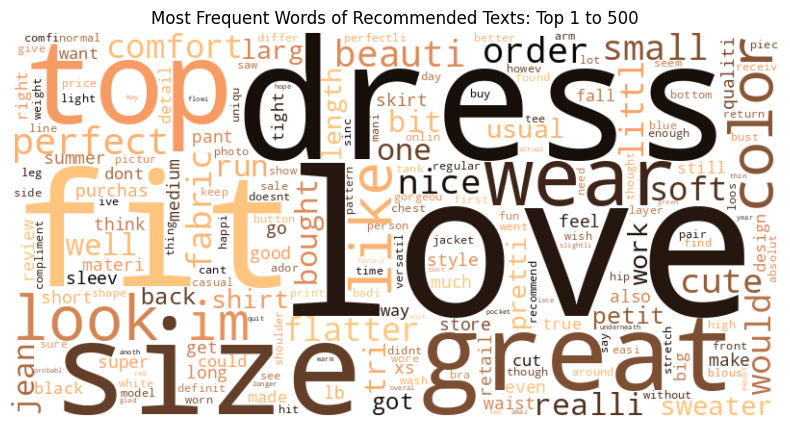

In [110]:
# Word Cloud in training

def generate_wordcloud(df, start, end, colormap='viridis',target='', word='Words'):
    frequency = df.str.split().explode().value_counts()
    words = frequency.index[start:end].tolist()
    counts = frequency.values[start:end].tolist()
    wordcloud_dict = {words[i]: counts[i] for i in range(len(words))}
    wordcloud = WordCloud(width=800, height=400, background_color='white',colormap=colormap).generate_from_frequencies(wordcloud_dict)
    
    plt.figure(figsize=(12, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words of {target} Texts: Top {start+1} to {end}')
    plt.axis('off')
    plt.show()

generate_wordcloud(train[train['Recommended IND']==1]['clean_text'], 0, 500, colormap= 'copper',target='Recommended')

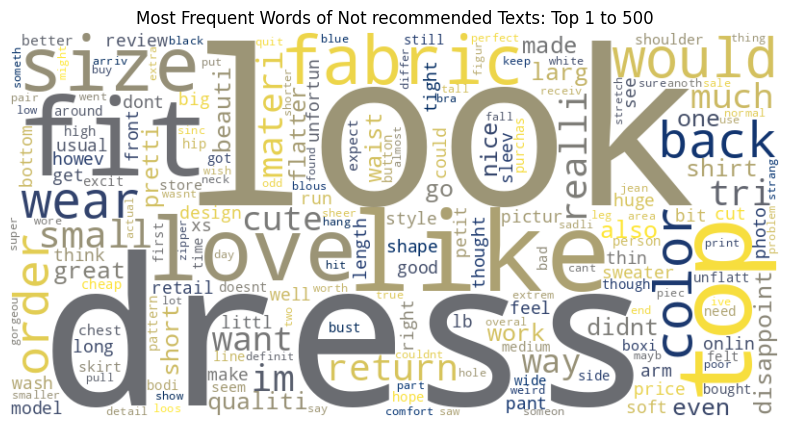

In [111]:
generate_wordcloud(train[train['Recommended IND']==0]['clean_text'], 0, 500, colormap= 'cividis',target='Not recommended')

## Unique Words in Training vs. Testing Sets after Text Pre-processing
We've seen there were a little below 5000 words in testing data while not in training data. In embedding methods that need to learn from training data, those words would be 'OOV'. Let's check how many of them remain 'OOV' after text pre-processing

Unique Words in training: 12835
Unique Words in testing: 6172
Unique Words in testing not in training: 1706
Unique Words in both testing and training: 14541


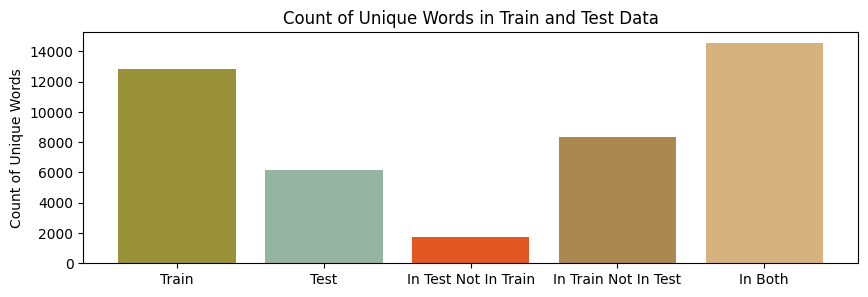

Some sample words in testing not in training:
 ['asian', 'packagei', 'freemov', 'workit', 'bustl', 'peepto', 'walz', 'downup', 'suspici', 'shapeit', 'jaundic', 'justiceif', 'boodi', 'deeperdark', 'tankblous', 'stylejust', 'bodywidth', 'forh', 'skill', 'pluck', 'trumpet', 'jerseyfeel', 'lessen', 'mantailor', 'preview', 'hiphit', 'fittedbut', 'beefier', 'alert', 'shirtbut', 'lookwear', 'queenworthi', 'figureâ', 'jeep', 'eghhh', 'unsecur', 'reallllli', 'valuabl', 'shoulderchest', 'superfici', 'twoinon', 'coop', 'supportlin', 'loooooooow', 'fabricalmost', 'allergi', 'wellright', 'foamlik', 'thisto', 'anniversaryi', 'beigebrown', 'menswar', 'adorn', 'digi', 'descent', 'fabulouslook', 'sweeten', 'fitaft', 'labcoat', 'wonc', 'greybrown', 'mou', 'stretchif', 'lotu', 'strangelyi', 'nesrli', 'pingorang', 'wrinklefre', 'rial', 'ingest', 'suuuuuper', 'dndt', 'bowback', 'priceit', 'balc', 'downyou', 'impromptu', 'blogger', 'suction', 'plusfor', 'fabriclycra', 'normals', 'acrylicfeel', 'lbsand', 'sh

In [112]:
# Now let's take a look again the unique words in training and testing data
unique_words_train=unique_words_train_test('clean_text',n=100)

#### ✍️ 'OOV' words after pre-processing:
Grate! After text pre-processing, the word in testing but not in training seems to reduced a lot from around 5000 to around 1700.

##### <a id="18"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.2:  Tokenize, Sequence, and Paddings </h2>
</div>

- Before sending text to machine learning models, we need to covert each text to sequences. In Tensorflow, just like each image need to be the same size, each sequences need to be the same length too. So, we need to pad the sequences to the same lengths. 
- 'fit_on_texts' takes a list (or a series) of text documents and updates the internal vocabulary based on the word frequency. The method creates a dictionary where the keys are unique words and the values are the integer indices assigned to those words. Importantly, here we want to do train/test split before and **only fit on training data**, so words in testing but not in training would be out of vacabulary words. This ensure the testing data mimic the real unseen data.


In [113]:
# Get X and y df in train and test set
X_train = train.drop(columns=['Recommended IND'])  
y_train =  train['Recommended IND']

X_test = test.drop(columns=['Recommended IND'])  
y_test =  test['Recommended IND']

In [114]:
# Tokenizer using Tensorflow Keras
VOCAB_SIZE = unique_words_train # unique words in training set
OOV_TOKEN ="<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words= VOCAB_SIZE , split=' ', oov_token=OOV_TOKEN)

# Generate the word index dictionary for the training sentences - important to only train on training set.
tokenizer.fit_on_texts(X_train['clean_text']) 
word_index = tokenizer.word_index

# Generate and pad sequences
sequences_train = tokenizer.texts_to_sequences(X_train['clean_text'].values)
padded_train = pad_sequences(sequences_train)
max_length = max(len(seq) for seq in padded_train)# Find maximum sequence length

sequences_test = tokenizer.texts_to_sequences(X_test['clean_text'].values)
padded_test = pad_sequences(sequences_test,maxlen=max_length, truncating='post')

print("Maximum sequence length:", max_length)

Maximum sequence length: 63


In [115]:
# Take a look at tokenization results
print('Cleaned Text: ', X_train['clean_text'][0],'\n')
print('Sequence: ', sequences_train[0],'\n')
print('Padded sequence: ',padded_train[0],'\n')

Cleaned Text:  absolut wonder silki sexi comfort 

Sequence:  [2, 822, 41, 664, 92, 664, 92] 

Padded sequence:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   2 822  41 664  92 664  92] 



# 
<div style="text-align: center; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 4: Model Building and Training 🪆
</h1>

We'll try a few different types of models. For each type, I've already done some tuning on parameters such as number of epochs, drop out rate (if needed), number of layers, etc.
 - Model 1: start with a basic Sequential Model with some dense Layers. For embedding, we will use tf build-in embedding, which learn on training data.
 - Model 2: based on model 1, discover what resampling would do on Model 1 performance
 - Model 3: discover performance on a more complex LSTM model 
 - Model 4: discover adding Glove Embedding to LSTM would do to performance. Here, we won't use processed data since Glove embedding won't work well with lots of word pre-processing.


##### <a id="19"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 4.1:  Basic Sequential Model with Dense Layer </h2>
</div>

Let's start with a simple model:
- with only dense layers (no RNN)
- with keras built in embedding: tf.keras.layers.Embedding. The tf.keras.layers. This embedding creates a word embedding where each word in the vocabulary is mapped to a dense vector of size EMBEDDED_DIM. This embedding is learned during the training process, with the initial vectors being randomly initialized.


## Model 1 v1. 

In [116]:
# Build the model
NUM_EPOCHS = 15
BATCH_SIZE = 128
EMBEDDED_DIM =100
MAX_LEN = 120
LEARNING_RATE = 0.0001

model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDED_DIM),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 

# Setup the training parameters
initial_learning_rate = LEARNING_RATE

# Compile the model with binary_crossentropy loss, Adam optimizer, and standard metrics
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.AUC(name='auc')])
# Train the model
history_model1 = model1.fit(padded_train, y_train, epochs=NUM_EPOCHS, validation_data=(padded_test, y_test), batch_size = BATCH_SIZE)

Epoch 1/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7959 - auc: 0.5006 - loss: 0.5906 - precision: 0.8212 - recall: 0.9606 - val_accuracy: 0.8174 - val_auc: 0.5422 - val_loss: 0.4799 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - auc: 0.5739 - loss: 0.4689 - precision: 0.8199 - recall: 1.0000 - val_accuracy: 0.8174 - val_auc: 0.7514 - val_loss: 0.4592 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - auc: 0.8254 - loss: 0.4380 - precision: 0.8179 - recall: 1.0000 - val_accuracy: 0.8180 - val_auc: 0.9154 - val_loss: 0.3748 - val_precision: 0.8179 - val_recall: 1.0000
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - auc: 0.9299 - loss: 0.3439 - precision: 0.8309 - recall: 0.9983 - val_accuracy: 0.8759 - val_auc: 0.9357 - val_loss: 0.2853 - val_precision: 0.8805 - val_recall: 0.9814
Epoch 5/15
142/142 ━━━━━━━━━━━━

#### ✍️ Model 1 (v1.) Performance and Improvement Plan:
It seems the model start to overfit after around 8 epochs - training accuracy is still improving but validation accuracy starts to drop. A few things to help with overfitting:
- Simplify model: for example, less layers, less nodes.
- Add drop out
- train with a little short period.

After several attempts, I find a model with just 1 internal dense layer, adding a dropout layer, and training only with 13 epochs produced the best results.

## Model 1 v2. with even Simplier Structure

In [117]:
# Build the model - less layers, train less
NUM_EPOCHS = 13
BATCH_SIZE = 128
EMBEDDED_DIM =100
MAX_LEN = 120
LEARNING_RATE = 0.0001
DROP_OUT=0.1

model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDED_DIM),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 

# Setup the training parameters
initial_learning_rate = LEARNING_RATE

# Compile the model with binary_crossentropy loss, Adam optimizer, and standard metrics
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.AUC(name='auc')])
# Train the model
history_model1 = model1.fit(padded_train, y_train, epochs=NUM_EPOCHS, validation_data=(padded_test, y_test), batch_size = BATCH_SIZE)

Epoch 1/13
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7988 - auc: 0.5090 - loss: 0.5768 - precision: 0.8225 - recall: 0.9622 - val_accuracy: 0.8174 - val_auc: 0.5651 - val_loss: 0.4801 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 2/13
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - auc: 0.5638 - loss: 0.4876 - precision: 0.8140 - recall: 1.0000 - val_accuracy: 0.8174 - val_auc: 0.7297 - val_loss: 0.4600 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 3/13
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8212 - auc: 0.7034 - loss: 0.4539 - precision: 0.8212 - recall: 1.0000 - val_accuracy: 0.8174 - val_auc: 0.8946 - val_loss: 0.4217 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 4/13
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8190 - auc: 0.8171 - loss: 0.4115 - precision: 0.8190 - recall: 1.0000 - val_accuracy: 0.8174 - val_auc: 0.9297 - val_loss: 0.3613 - val_precision: 0.8175 - val_recall: 0.9997
Epoch 5/13
142/142 ━━━━━━━━━━━━

In [118]:
# Plot results function
def plot_results(history, model_name="", early_stopping_callback=None):
    metrics = ['accuracy', 'loss', 'precision', 'recall']
    titles = [f'{model_name} Accuracy', f'{model_name} Loss', f'{model_name} Precision', f'{model_name} Recall', f'{model_name} F1 Score']
        
    # Calculate F1 score for training and validation data
    train_precision = history.history['precision']
    train_recall = history.history['recall']
    train_f1_scores = [2 * (train_precision[i] * train_recall[i]) / (train_precision[i] + train_recall[i] + 1e-8)
                   for i in range(len(train_precision))]  # Avoid division by zero
    
    val_precision = history.history['val_precision']
    val_recall = history.history['val_recall']
    val_f1_scores = [2 * (val_precision[i] * val_recall[i]) / (val_precision[i] + val_recall[i] + 1e-8)
                     for i in range(len(val_precision))]  # Avoid division by zero
    
    fig, axs = plt.subplots(3, 2, figsize=(20, 15))

    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        axs[row, col].plot(history.history[metric])
        axs[row, col].plot(history.history[f'val_{metric}'])
        axs[row, col].set_title(titles[i], fontsize=20)  
        axs[row, col].tick_params(axis='both', which='major', labelsize=20)  
        axs[row, col].legend(['Train', 'Validate'], loc='upper left', fontsize=20)

    # Plot F1 score 
    axs[-1, 0].plot(train_f1_scores)
    axs[-1, 0].plot(val_f1_scores)
    axs[-1, 0].set_title(titles[-1], fontsize=20)  
    axs[-1, 0].tick_params(axis='both', which='major', labelsize=20)  
    axs[-1, 0].legend(['Train', 'Validate'], loc='upper left', fontsize=20)
 
    if early_stopping_callback is not None:
        # return best accuracy and corresponding metrics if early stopping
        val_accuracy = history.history['val_accuracy']
        best_index = np.argmax(val_accuracy)
        best_accuracy = val_accuracy[best_index]
        best_precision = val_precision[best_index]
        best_recall = val_recall[best_index]
        best_f1_score = val_f1_scores[best_index]
        return best_accuracy, best_precision, best_recall, best_f1_score
    else:
        # no early stopping callback
        return history.history['val_accuracy'][-1],  val_precision[-1],val_recall[-1],  val_f1_scores[-1]

    plt.tight_layout()
    plt.show()


model 1 accuracy 0.9076855182647705
model 1 precision 0.9376166462898254
model 1 recall 0.9502837061882019
model 1 f1 score 0.9439076757743011


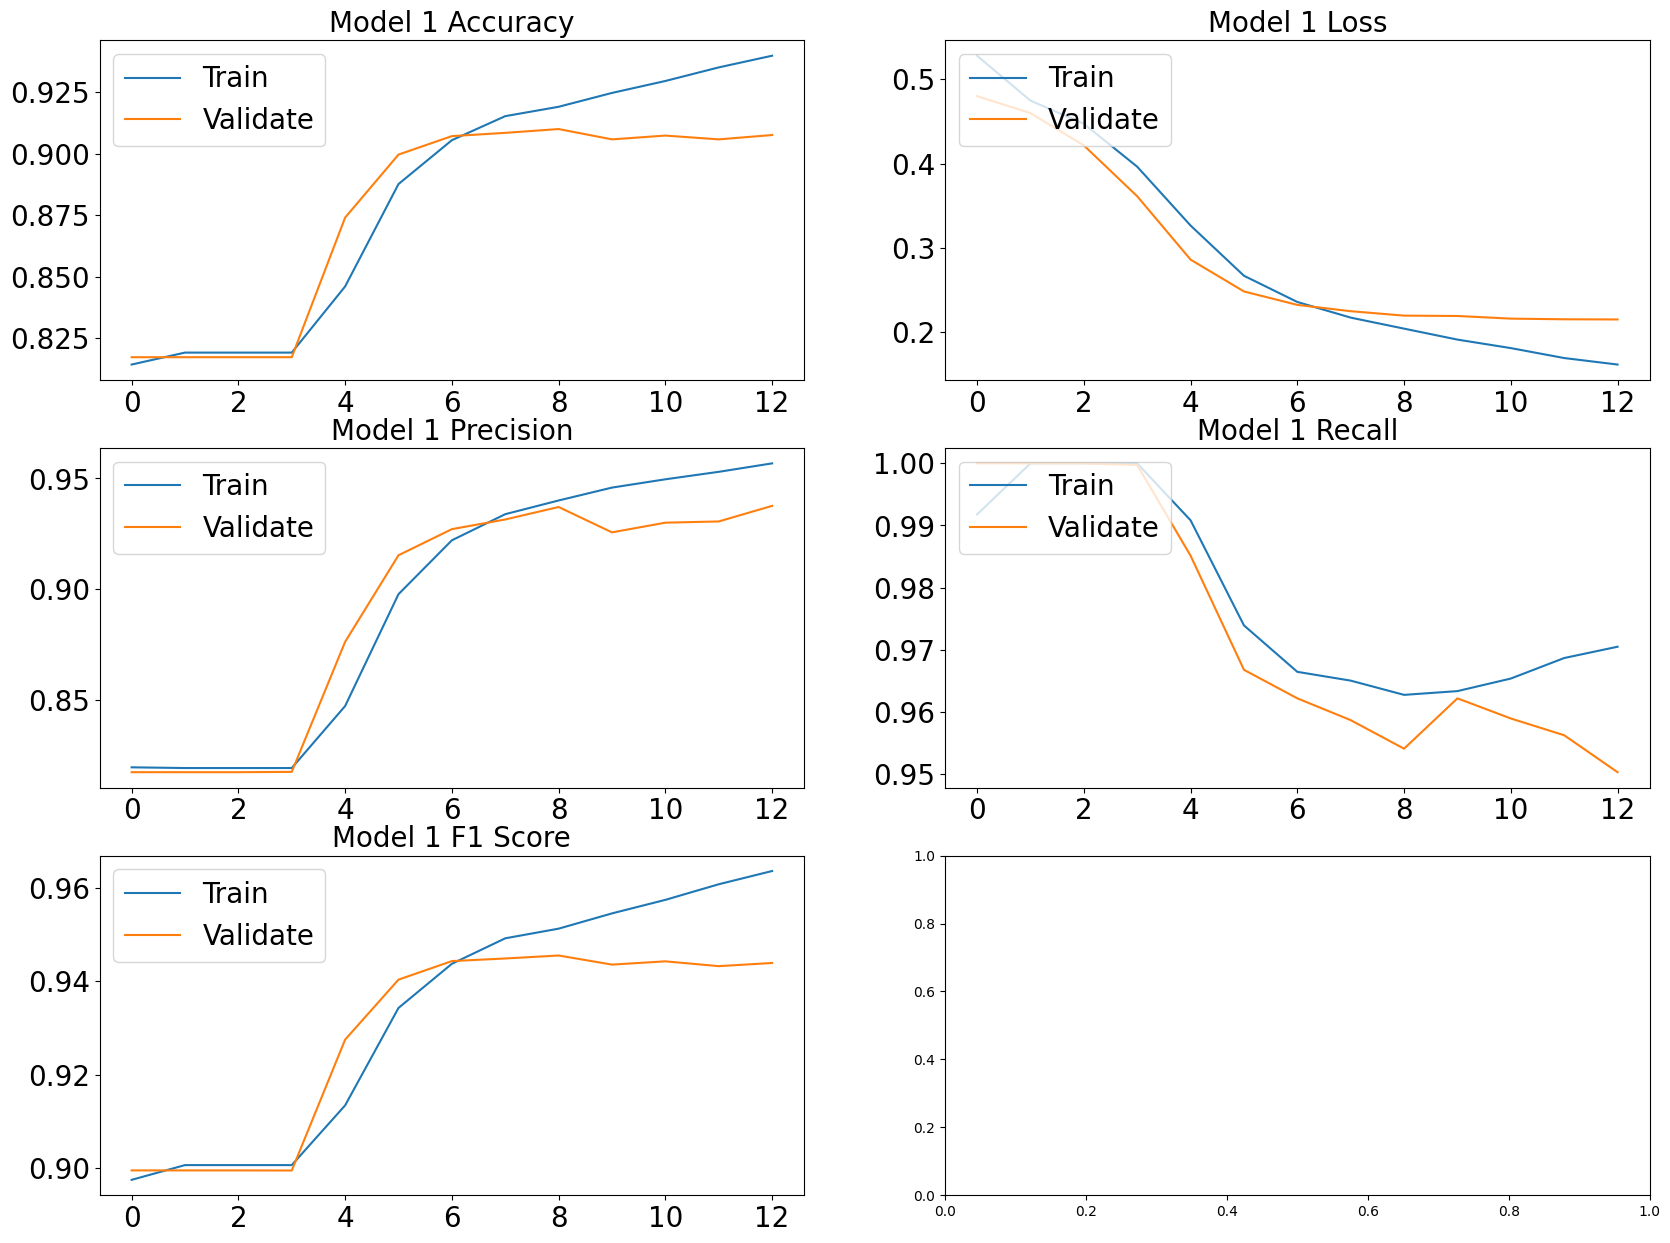

In [119]:
# Plot results
model1_val_accuracy, model1_val_precision, model1_val_recall ,model1_val_f1_scores = plot_results(history_model1,model_name='Model 1' )
print('model 1 accuracy', model1_val_accuracy)
print("model 1 precision", model1_val_precision)
print("model 1 recall",model1_val_recall)
print("model 1 f1 score",model1_val_f1_scores)

In [120]:
# Confusion matrix
def plot_cfm(model, X, y_actual, model_name=""):
        # predictions
        pred_prob = model.predict(padded_test)
        pred_prob = np.transpose(pred_prob)[0]
        y_pred = list(map(lambda x: 0 if x < 0.5 else 1, pred_prob))

        #confusion Matrix
        cfm= confusion_matrix(y_actual, y_pred)
        plt.figure(figsize=(1, 1))
        display = ConfusionMatrixDisplay(confusion_matrix=cfm) 
        display.plot(cmap='Greens')
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.gcf().set_size_inches(4, 3) 
        plt.show()
        return y_pred

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 100x100 with 0 Axes>

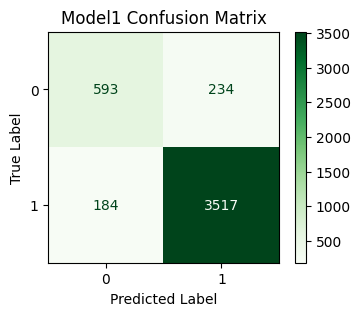

In [121]:
y_pred_model1=plot_cfm(model1,X=padded_test, y_actual= y_test, model_name='Model1')

#### ✍️ Model 1 v2.(tf build in embedding learned on training data, dense layers) Performance and Next Model Plan:
- We've seen for this model, a simpler model with fewer layers, and with some drop-outs work best. But a few area to improve:
  - The false positive is a bit higher than false negative. This could due to the imbalance training data that we have more positive samples than negative. So, the model tend to label more towards positive end.
  - To fix this, let's try a resampling method for our next model.

##### <a id="20"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 4.2:  Model 2 - Model 1 with Resampling </h2>
</div>

## Resampling
To address the class imbalance in our dataset, we will upsample the minority class (negative comments). It is crucial to strike a balance during this process; excessive upsampling can lead to an overabundance of duplicate data, increasing the risk of overfitting. Therefore, careful consideration will be given to ensure that the upsampled data enhances model performance without compromising its generalization capability.

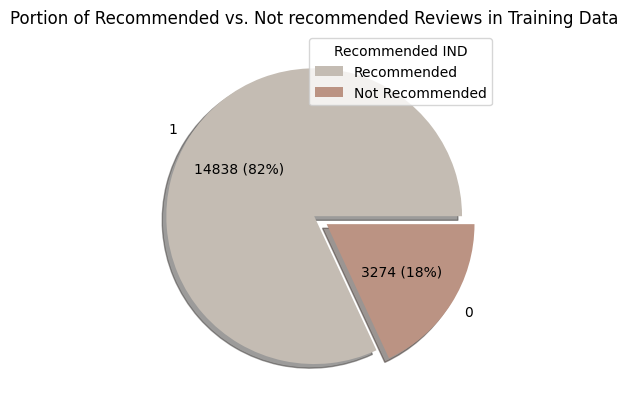

In [122]:
#Plot dependent variable distribution in training set 
#parameters for plot
sizes = train['Recommended IND'].value_counts()
labels = ["1", "0"]
explode = (0, 0.1)  #pull out second slice by 10%
colors = ['#c4bcb3', '#bb9383'] 
# Pie chart 
plt.pie(x=sizes, labels=labels, explode=explode, shadow=True, autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(sizes) / 100, p), colors=colors)
plt.title('Portion of Recommended vs. Not recommended Reviews in Training Data')
plt.legend(title="Recommended IND", loc="upper right", labels=[f"Recommended", f"Not Recommended"])
plt.show()

In [123]:
# Resampling  in training set - upsampling
#create two different dataframe of majority and minority class 
train_minority = train[(train['Recommended IND']==0)] 
train_majority = train[(train['Recommended IND']==1)] 

# Upsample minority class
train_minority_upsampled = resample(train_minority,
                                    replace=True,  
                                    n_samples=6000,  
                                    random_state=100)

train = pd.concat([train_minority_upsampled, train_majority])
train = train.sample(frac=1, random_state=100)

Positive and Negative Recommended Reviews in training data: 
 Recommended IND
1    14838
0     6000
Name: count, dtype: int64


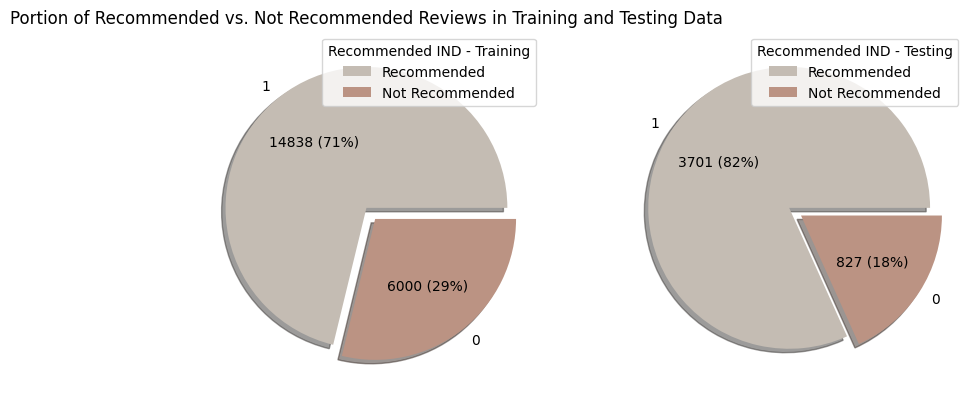

In [124]:
# Plot dependent variable distribution in training and testing set 
# parameters for plot
sizes_train = train['Recommended IND'].value_counts()
sizes_test = test['Recommended IND'].value_counts()
print('Positive and Negative Recommended Reviews in training data: \n',sizes_train)
# Pie chart
plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)
plt.pie(x=sizes_train, labels=labels, explode=explode, shadow=True, autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(sizes_train) / 100, p), colors=colors)
plt.title('Portion of Recommended vs. Not Recommended Reviews in Training and Testing Data')
plt.legend(title="Recommended IND - Training", loc="upper right", labels=[f"Recommended", f"Not Recommended"])

plt.subplot(1, 2, 2)
plt.pie(x=sizes_test, labels=labels, explode=explode, shadow=True, autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p * sum(sizes_test) / 100, p), colors=colors)
plt.legend(title="Recommended IND - Testing", loc="upper right", labels=[f"Recommended", f"Not Recommended"])
plt.show()

## Tokenize, Sequence, and Padding again after Resampling

In [125]:
# Get X and y df in train and test set
X_train= train.drop(columns=['Recommended IND'])  
y_train =  train['Recommended IND']

X_test = test.drop(columns=['Recommended IND'])  
y_test =  test['Recommended IND']

In [126]:
# Tokenizer using Tensorflow Keras
VOCAB_SIZE = unique_words_train# unique words in training set
OOV_TOKEN ="<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words= VOCAB_SIZE , split=' ', oov_token=OOV_TOKEN)

# Generate the word index dictionary for the training sentences - important to only train on training set.
tokenizer.fit_on_texts(X_train['clean_text']) 
word_index = tokenizer.word_index

# Generate and pad sequences
sequences_train = tokenizer.texts_to_sequences(X_train['clean_text'].values)
padded_train = pad_sequences(sequences_train)
max_length= max(len(seq) for seq in padded_train)# Find maximum sequence length

sequences_test = tokenizer.texts_to_sequences(X_test['clean_text'].values)
padded_test = pad_sequences(sequences_test,maxlen=max_length, truncating='post')

print("Maximum sequence length:", max_length)

Maximum sequence length: 63


## Fit model 2 

For parameters, after several attemps, I find:
- As usual, have drop out layers to help with overfitting. But drop out rate need to be low or otherwise the model won't learn well.
- After upsampling, the model tends to overfit more. However, increase drop out would prevent the model to learn best. I find have a bit less epochs work the best to help with overfitting.


In [131]:
# Build the model
NUM_EPOCHS = 10
BATCH_SIZE = 128
EMBEDDED_DIM =100
LEARNING_RATE = 0.0001
DROP_OUT=0.1

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE+1, output_dim=EMBEDDED_DIM),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(DROP_OUT),
#     tf.keras.layers.Dense(12, activation='relu'),
#     tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 

# Compile the model with binary_crossentropy loss, Adam optimizer, and standard metrics
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.AUC(name='auc')])

In [132]:
# Train the model
history_model2 = model2.fit(padded_train, y_train, epochs=NUM_EPOCHS, validation_data=(padded_test, y_test), batch_size = BATCH_SIZE)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6890 - auc: 0.5088 - loss: 0.6442 - precision: 0.7085 - recall: 0.9551 - val_accuracy: 0.8174 - val_auc: 0.5928 - val_loss: 0.5148 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7122 - auc: 0.6274 - loss: 0.5873 - precision: 0.7122 - recall: 1.0000 - val_accuracy: 0.8174 - val_auc: 0.8592 - val_loss: 0.4709 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7174 - auc: 0.8336 - loss: 0.5248 - precision: 0.7174 - recall: 1.0000 - val_accuracy: 0.8189 - val_auc: 0.9258 - val_loss: 0.3931 - val_precision: 0.8188 - val_recall: 0.9997
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - auc: 0.9240 - loss: 0.4188 - precision: 0.7891 - recall: 0.9793 - val_accuracy: 0.8973 - val_auc: 0.9374 - val_loss: 0.2857 - val_precision: 0.9153 - val_recall: 0.9635
Epoch 5/10
163/163 ━━━━━━━━━━━━

model 2 accuracy 0.9083480834960938
model 2 precision 0.9435744881629944
model 2 recall 0.944339394569397
model 2 f2 score 0.9439567814116152


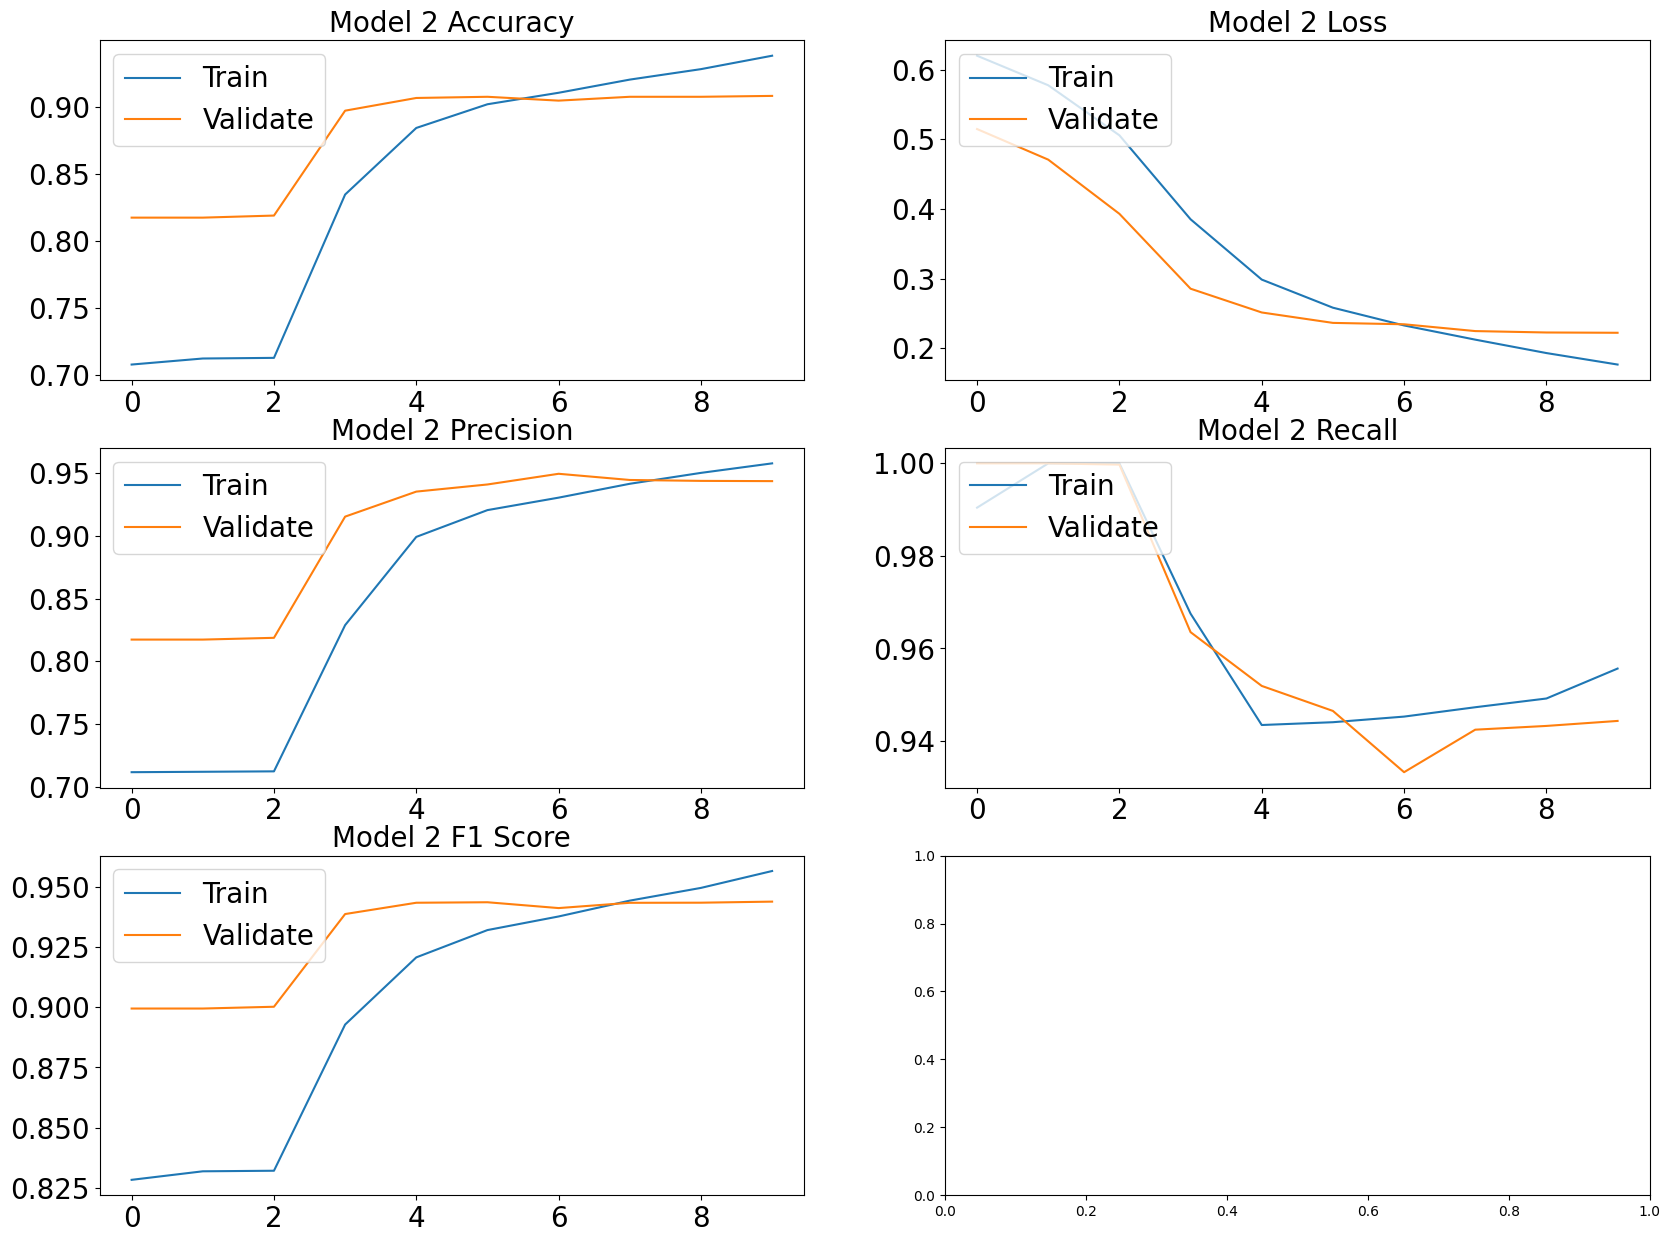

In [133]:
# Plot results
model2_val_accuracy, model2_val_precision, model2_val_recall ,model2_val_f1_scores = plot_results(history_model2,model_name='Model 2' )
print('model 2 accuracy', model2_val_accuracy)
print("model 2 precision", model2_val_precision)
print("model 2 recall",model2_val_recall)
print("model 2 f2 score",model2_val_f1_scores)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 100x100 with 0 Axes>

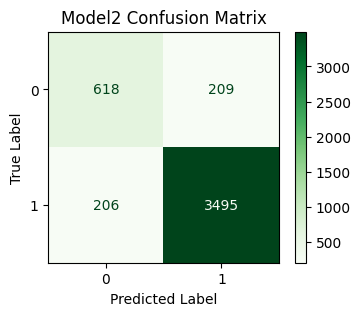

In [134]:
y_pred_model2=plot_cfm(model2,X=padded_test, y_actual= y_test, model_name='Model2')

In [57]:
# Take a look at false positive, false negative Recommended Text
# function
def fp_fn_look(y_pred_model):
        fp_indices = np.where((np.array(y_pred_model)== 1) & (y_test == 0))[0]
        fn_indices = np.where((np.array(y_pred_model)== 1) & (y_test == 1))[0]

        # False positive
        print('****************************** Not recommended text predicted as recommended (False Positive) ***********************************')
        indices = np.random.choice(fp_indices,2, replace=False)
        for i in indices:
            print(f'text{i}\n', X_test.iloc[i]['clean_text'],'\n' )

        #  False negative
        print('****************************** Recommended Text predicted as not recommended (False Negative) ***********************************')
        indices = np.random.choice(fn_indices,2,replace=False)
        for i in indices:
            print(f'text{i}\n',X_test.iloc[i]['clean_text'] )
            
#model  fp, fn samples
fp_fn_look(y_pred_model2)

****************************** Not recommended text predicted as recommended (False Positive) ***********************************
text754
 tri beig love could find size got pink look good beig perfer beig pink 

text663
 order white peachi color armhol gape well design dont recommend tee big armhol 

****************************** Recommended Text predicted as not recommended (False Negative) ***********************************
text3458
 dress beauti necklin low strap wide enough wear normal bra waist flatter ruffl bottom much short order petit perfect fit need warmer weather love
text2898
 shirt amaz pictur model shirt justic shirt bit longer person shown model color also vibrant materi soft great flow excit dress work pencil skirt option wear skinni cute sandal day amaz top


#### ✍️ Model 2 Performance and Next Model Plan:
- It seems model 2 overall performance is similar to model 1. There was a noticeable shift in the distribution of false positives and false negatives. Specifically, upsampling the minority class led to a more balanced distribution, with a reduction in false positives and an increase in false negatives. 

- This indicates that upsampling helps address the class imbalance in the predictions. However, it's important to note that while reducing false positives, the number of false negatives may increase so the metrics focusing on overall performance (such as F1 score, accuracy) won't improve afer re-sampling. But, if the goal is to lower the false positive rate, upsampling can be beneficial, but one must be mindful of the trade-off with false negatives.

- Traditional dense layer don't consider sequence, which can be helpful in interpretating meanings in a sentence. Next, we will try LSTM, which put sequence in consideration when interpretate meaning of texts. However, this may or may not works since LSTM is quite complex and can overfit if we don't have lots of data. As we've seen, for this data, it seems the simpler model work better.

##### <a id="21"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 4.3:  Model 3 - Recurrent Model LSTM </h2>
</div>

<div style="background-color: #f4f4f4; padding: 10px;">
<span style="font-size: larger;">
    
### Why Recurrent Nearul Network? How it works?
Recurrent Neural Networks (RNNs) is well-suited for processing sequential data. Recurrent Neural Networks (RNNs) excel in processing sequential data by scanning each sequence from left to right, timestamp by timestamp. At each timestamp, the RNN cell receives input from the current word in the sequence and incorporates information from previous words. For instance, at timestamp 1, the first word is fed into the RNN cell, producing an output. Then, at timestamp 2, the RNN cell takes both the input from the second word and the output from the first timestamp, enabling it to consider context from previous words as well.

This method allows RNNs to capture sequential information effectively, as each timestamp builds upon the understanding gained from preceding timestamps. Moreover, in bidirectional RNNs, information from subsequent sequences is also integrated, enhancing the model's ability to comprehend both past and future contexts. Thus, RNNs are adept at capturing the intricate dependencies present in sequential data.
    
### What is LSTM?
    
- While Recurrent Neural Networks (RNNs) are designed for processing sequential data, they face challenges like the vanishing and exploding gradient problems. While the latter issue is relatively easier to address—often mitigated through techniques like gradient clipping—the former presents a more intricate obstacle. The vanishing gradient problem impedes the flow of information from earlier time steps (or later ones, in the case of bidirectional RNNs) through to subsequent time steps, making it difficult for the model to retain crucial context over extended sequences.

- Long Short-Term Memory (LSTM) networks offer a solution to this challenge by introducing specialized units designed to manage both long-term and short-term memory. LSTM achieves this by incorporating various gates:

  - Forget Gate (Ft): This gate evaluates the relevance of past information in light of the current input, deciding whether to retain or discard long-term memory from previous time steps. By selectively updating the cell state, the forget gate ensures that less pertinent information is discarded.

  - Input Gates (It and Gt): Responsible for regulating the influx of new information into the cell state, these gates jointly determine both the quantity and significance of incoming data. By weighing the relevance of the previous cell state against the current input, these gates dictate how much and what type of new information is integrated into the cell state.

  - Output Gate (Ot): Crucial for controlling the flow of information from the cell state to the output, the output gate dictates which aspects of the current cell state are exposed to the rest of the network. By considering both the previous hidden state and the current input, the output gate governs the update of short-term memory.

- By adeptly managing both long-term and short-term memories through these specialized gates, the LSTM architecture excels at capturing and retaining essential context and dependencies across sequences of varying lengths. 

For parameters, after several attemps, I find:
- As usual, have drop out layers to help with overfitting. But drop out rate need to be low or otherwise the model won't learn well. 
- For drop outs, we will have some internal ones inside LSTM layer. Also, LSTM layer will have regularization to help with the fit.
- LSTM seems to be easily overfit for this data. That is, a simplier LSTM work better than a more complex one. So, we use less cells (for example 6) and less epochs here. And, less layer works better. We'll only have one LSTM layer.
- After upsampling, the model tends to overfit more. However, increase drop out would prevent the model to learn best. I find have a bit less epochs work the best to help with overfitting.
- We'll use a learning rate scheduling. It seems after several epochs, a smaller learning rate works better. While at the beginning, a slighterly larger learning rate help with model to learn faster.

In [58]:
# Build the model 3
# hyper-papameters
EMBEDDED_DIM = 100
LEARNING_RATE = 0.0002
LEARNING_RATE_MIN=0.0001
DECAY_STEPS = 100 
DECAY_RATE = 0.9
DROP_OUT_REC=0
DROP_OUT_LSTM=0.1
DROP_OUT=0.1
NUM_EPOCHS = 8
BATCH_SIZE = 128

model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE+1, EMBEDDED_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8,  dropout=DROP_OUT_LSTM, recurrent_dropout=DROP_OUT_REC,kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


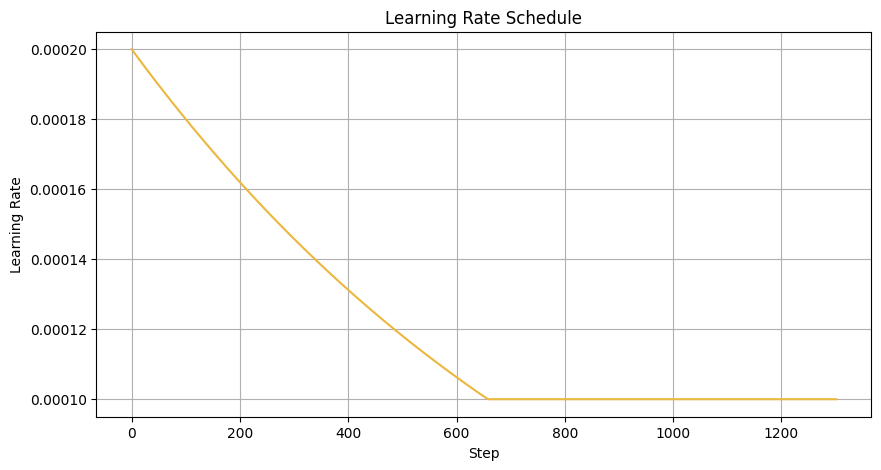

In [59]:
# Define the learning rate scheduler
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, learning_rate_min, decay_steps, decay_rate):
        super(CustomSchedule, self).__init__()
        self.initial_learning_rate = initial_learning_rate 
        self.min_learning_rate = learning_rate_min
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate
        

    def __call__(self, step):
            learning_rate = tf.math.maximum(self.initial_learning_rate * self.decay_rate ** (step  / self.decay_steps), self.min_learning_rate)
            return learning_rate
    
# learning rate scheduler instance
learning_rate_scheduler = CustomSchedule(initial_learning_rate=LEARNING_RATE, learning_rate_min=LEARNING_RATE_MIN ,decay_steps=DECAY_STEPS, decay_rate=DECAY_RATE)

# plot
# Number of steps in training
num_steps = int(X_train.shape[0] /BATCH_SIZE * NUM_EPOCHS )

# Generate learning rates for each step
learning_rates = [learning_rate_scheduler(tf.constant(step, dtype=tf.float32)).numpy() for step in range(num_steps)]

# Plot learning rates
plt.figure(figsize=(10,5))
plt.plot(range(num_steps), learning_rates, color='#ebb73d')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()

#compile model
model3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler),
               metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.AUC(name='auc')])

In [60]:
history_model3 = model3.fit(padded_train, 
                            y_train,
                            epochs=NUM_EPOCHS, 
                            validation_data=(padded_test, y_test), 
                            batch_size=BATCH_SIZE)

Epoch 1/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.7145 - auc: 0.5374 - loss: 0.7045 - precision: 0.7161 - recall: 0.9961 - val_accuracy: 0.8174 - val_auc: 0.8965 - val_loss: 0.5347 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 2/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.7127 - auc: 0.8391 - loss: 0.5804 - precision: 0.7132 - recall: 0.9989 - val_accuracy: 0.8174 - val_auc: 0.9305 - val_loss: 0.3890 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 3/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.7535 - auc: 0.9314 - loss: 0.4481 - precision: 0.7459 - recall: 0.9921 - val_accuracy: 0.8916 - val_auc: 0.9349 - val_loss: 0.3306 - val_precision: 0.9047 - val_recall: 0.9695
Epoch 4/8
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.8665 - auc: 0.9500 - loss: 0.3911 - precision: 0.8592 - recall: 0.9708 - val_accuracy: 0.8989 - val_auc: 0.9358 - val_loss: 0.3109 - val_precision: 0.9202 - val_recall: 0.9595
Epoch 5/8
163/163 ━━━━━━

model 3 accuracy 0.900397539138794
model 3 precision 0.9384781718254089
model 3 recall 0.9397460222244263
model 3 f1 score 0.9391116641088492


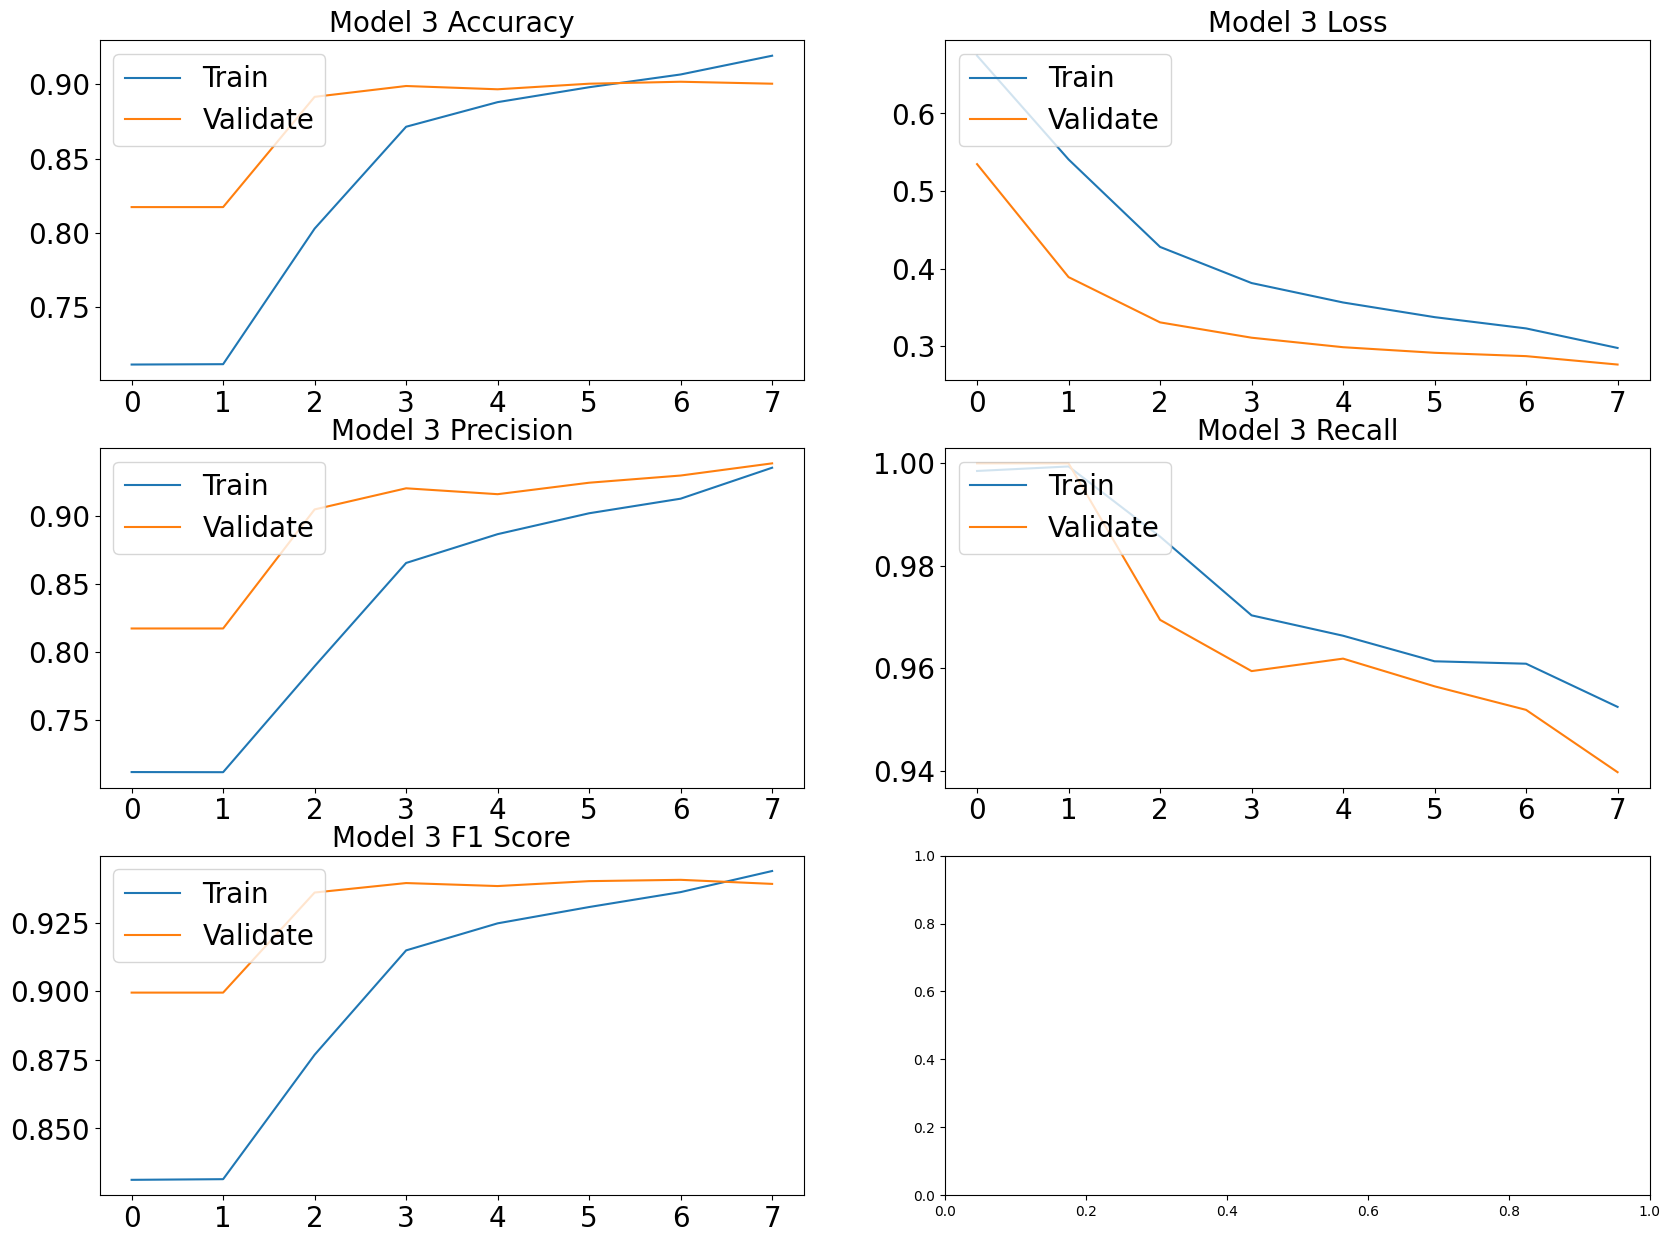

In [61]:
# Plot results
model3_val_accuracy, model3_val_precision, model3_val_recall ,model3_val_f1_scores = plot_results(history_model3,model_name='Model 3' )
print('model 3 accuracy', model3_val_accuracy)
print("model 3 precision", model3_val_precision)
print("model 3 recall",model3_val_recall)
print("model 3 f1 score",model3_val_f1_scores)

142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


<Figure size 100x100 with 0 Axes>

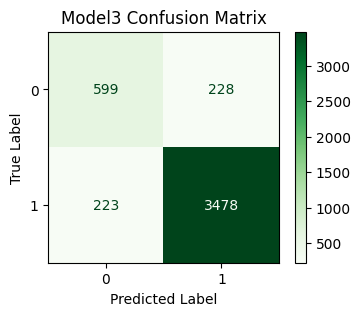

In [62]:
y_pred_model3=plot_cfm(model3,X=padded_test, y_actual= y_test, model_name='Model3')

In [63]:
#model  fp, fn samples
fp_fn_look(y_pred_model3)

****************************** Not recommended text predicted as recommended (False Positive) ***********************************
text2396
 love style top longer length would great leg fit short somewhat fit top yet alin shape give full swing bottom ruffl vnecklin pretti like longer length short sleev attribut unfortun cut armhol realli big put arm forward sleev pull arm tri decid keep anyway dollar thin 

text1851
 love open shoulder larg flowi rest could worn month preggo flowi 

****************************** Recommended Text predicted as not recommended (False Negative) ***********************************
text3246
 hadnt seen descript onlin would never known pant navi bought today tri black tunic look fantast style similar cartonni slim pant fabric lighter weight stretchier sinc im heavi around stomach wear pant long tunic top avoid drumstick look shame sinc pocket cute color pant mean match contrast wid color fun slim pant
text2668
 gener wear small medium top decid get mediumlarg

#### ✍️ Model 3 Performance and Next Model Plan:
- Unfortunately LSTM work worse than a simpler dense layer model. The incorrect prediction increased around 30 in counts.
- The reason could be LSTM is too complex for such small and imbalanced dataset. 
- Recall that we have some words in testing data that are not in training. Those could make overfitting worse. Using a pre-trained embedding could help because the embedding doesn't just depend on training data here, which is small. It's sort of doing a transfer learning that use information learned on larger dataset in terms of word embedding. So, next we'll try Glove Embedding. 

##### <a id="22"></a>

<div style="text-align: center; background-color: #c2a193; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 4.4:  Model 4 - Recurrent Model LSTM with Glove Embedding</h2>
</div>

<div style="background-color: #f4f4f4; padding: 10px;">
<span style="font-size: larger;">
    
## Global Vectors for Word Representation (GloVe)
- Leverages co-occurrence statistics of word-word to learn word embeddings.

- Words with similar meanings or contexts are closer together in a vector space, while words with different meanings are farther apart.
    
- Note for Glove embedding, if we preprocessing text too much (like tradition), it won't work well. So, we'll use the less or even un-preprocessed text here.

In [64]:
GLOVE_FILE = '../input/glove6b100dtxt/glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

I've tried and pre-processed text doesn't work well for Glove embedding for this data. Let's just use the less or even raw texts.

In [65]:
def text_preprocessing_glove(text):
    
    # Lemmatization - have lookup error,Resource 'corpora/wordnet' not found.
#     lemmatizer = WordNetLemmatizer()
#     text = text.apply(lambda doc: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(doc)]))

    # remove extra spaces
    text = text.apply(lambda doc: re.sub(' +', ' ', doc))

    return text

In [66]:
# Go back and use un-preprocessed text for Glove embedding
train['clean_text'] =text_preprocessing_glove(train['Review Text'])
test['clean_text'] = text_preprocessing_glove(test['Review Text'])

# Tokenizer using Tensorflow Keras
VOCAB_SIZE = unique_words_train # unique words in training set
OOV_TOKEN ="<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words= VOCAB_SIZE , split=' ', oov_token=OOV_TOKEN)

# Generate the word index dictionary for the training sentences - important to only train on training set.
tokenizer.fit_on_texts(X_train['clean_text']) 
word_index = tokenizer.word_index

# Generate and pad sequences
sequences_train = tokenizer.texts_to_sequences(X_train['clean_text'].values)
padded_train = pad_sequences(sequences_train)
max_length = max(len(seq) for seq in padded_train)# Find maximum sequence length

sequences_test = tokenizer.texts_to_sequences(X_test['clean_text'].values)
padded_test = pad_sequences(sequences_test,maxlen=max_length, truncating='post')

print("Maximum sequence length:", max_length)


Maximum sequence length: 63


In [67]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:100])

How many missed words?  7123
As example:  ['<OOV>', 'beauti', 'realli', 'littl', 'larg', 'pretti', 'qualiti', 'sleev', 'pictur', 'onlin', 'howev', 'gorgeou', 'definit', 'piec', 'perfectli', 'comfi', 'blous', 'receiv', 'boxi', 'uniqu', 'unfortun', 'anoth', 'easi', 'versatil', 'slightli', 'probabl', 'someth', 'flowi', 'figur', 'mayb', 'decid', 'everi', 'amaz', 'issu', 'everyth', 'typic', 'skinni', 'heavi', 'excit', 'necklin', 'especi', 'easili', 'extrem', 'arriv', 'unflatt', 'someon', 'surpris', 'curvi', 'embroideri', 'anyth', 'alreadi', 'highli', 'exactli', 'stretchi', 'itchi', 'tshirt', 'wardrob', 'simpl', 'pilcro', 'stapl', 'notic', 'baggi', 'theyr', 'ankl', 'wrinkl', 'textur', 'eleg', 'exchang', 'consid', 'otherwis', 'immedi', 'worri', 'bulki', 'curv', 'addit', 'previou', 'incred', 'awesom', 'elast', 'roomi', 'booti', 'sometim', 'ruffl', 'armhol', 'peopl', 'structur', 'insid', 'scratchi', 'perhap', 'ivori', 'athlet', 'dressi', 'terribl', 'classi', 'coupl', 'fabul', 'substanti', 'maev

- There are 7123 missed words. This isn't good. The missed words above seem to be stemmed words although I didn't do word stemming.
- I tried to use word lemmatization but for some reason it has some issues with missing packages. ;(. 
- Note there are different types of glove embeddings with different sized we could use. But due to some memory issues, I could only use a small one here, which might contribute to so many words not being recognized. 
- My guess is this won't work well since if we use tf built-in word embedding, there are only a little above 1500 words in testing data that aren't in training. But let's still give it a try,

## Fit model


In [68]:
# Build the model 
# hyper-papameters
EMBEDDED_DIM =EMBEDDINGS_MATRIX.shape[1]
LEARNING_RATE = 0.0002
LEARNING_RATE_MIN=0.0001
DECAY_STEPS = 100 
DECAY_RATE = 0.9
DROP_OUT_REC=0
DROP_OUT_LSTM=0.1
DROP_OUT=0.1
NUM_EPOCHS =20
BATCH_SIZE = 128

model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE+1, EMBEDDED_DIM,embeddings_initializer=Constant(EMBEDDINGS_MATRIX ),trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8,  dropout=DROP_OUT_LSTM, recurrent_dropout=DROP_OUT_REC,kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [69]:
# learning rate scheduler instance
learning_rate_scheduler = CustomSchedule(initial_learning_rate=LEARNING_RATE, learning_rate_min=LEARNING_RATE_MIN ,decay_steps=DECAY_STEPS, decay_rate=DECAY_RATE)

#compile model
model4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler),
               metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.AUC(name='auc')])

In [70]:
history_model4 = model4.fit(padded_train, 
                            y_train,
                            epochs=NUM_EPOCHS, 
                            validation_data=(padded_test, y_test), 
                            batch_size=BATCH_SIZE)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.6592 - auc: 0.5084 - loss: 0.7305 - precision: 0.7093 - recall: 0.8816 - val_accuracy: 0.8174 - val_auc: 0.7429 - val_loss: 0.5629 - val_precision: 0.8174 - val_recall: 1.0000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7153 - auc: 0.6894 - loss: 0.6376 - precision: 0.7165 - recall: 0.9948 - val_accuracy: 0.8244 - val_auc: 0.8328 - val_loss: 0.4940 - val_precision: 0.8233 - val_recall: 0.9997
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.7311 - auc: 0.7983 - loss: 0.5753 - precision: 0.7309 - recall: 0.9787 - val_accuracy: 0.8551 - val_auc: 0.8753 - val_loss: 0.4237 - val_precision: 0.8734 - val_recall: 0.9622
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 145ms/step - accuracy: 0.8006 - auc: 0.8653 - loss: 0.4951 - precision: 0.8075 - recall: 0.9426 - val_accuracy: 0.8666 - val_auc: 0.8984 - val_loss: 0.3764 - val_precision: 0.9198 - val_recall: 0.9168
Epoch 5/20
163/163 ━

model 4 accuracy 0.9037102460861206
model 4 precision 0.9449441432952881
model 4 recall 0.9367738366127014
model 4 f1 score 0.9408412474631366


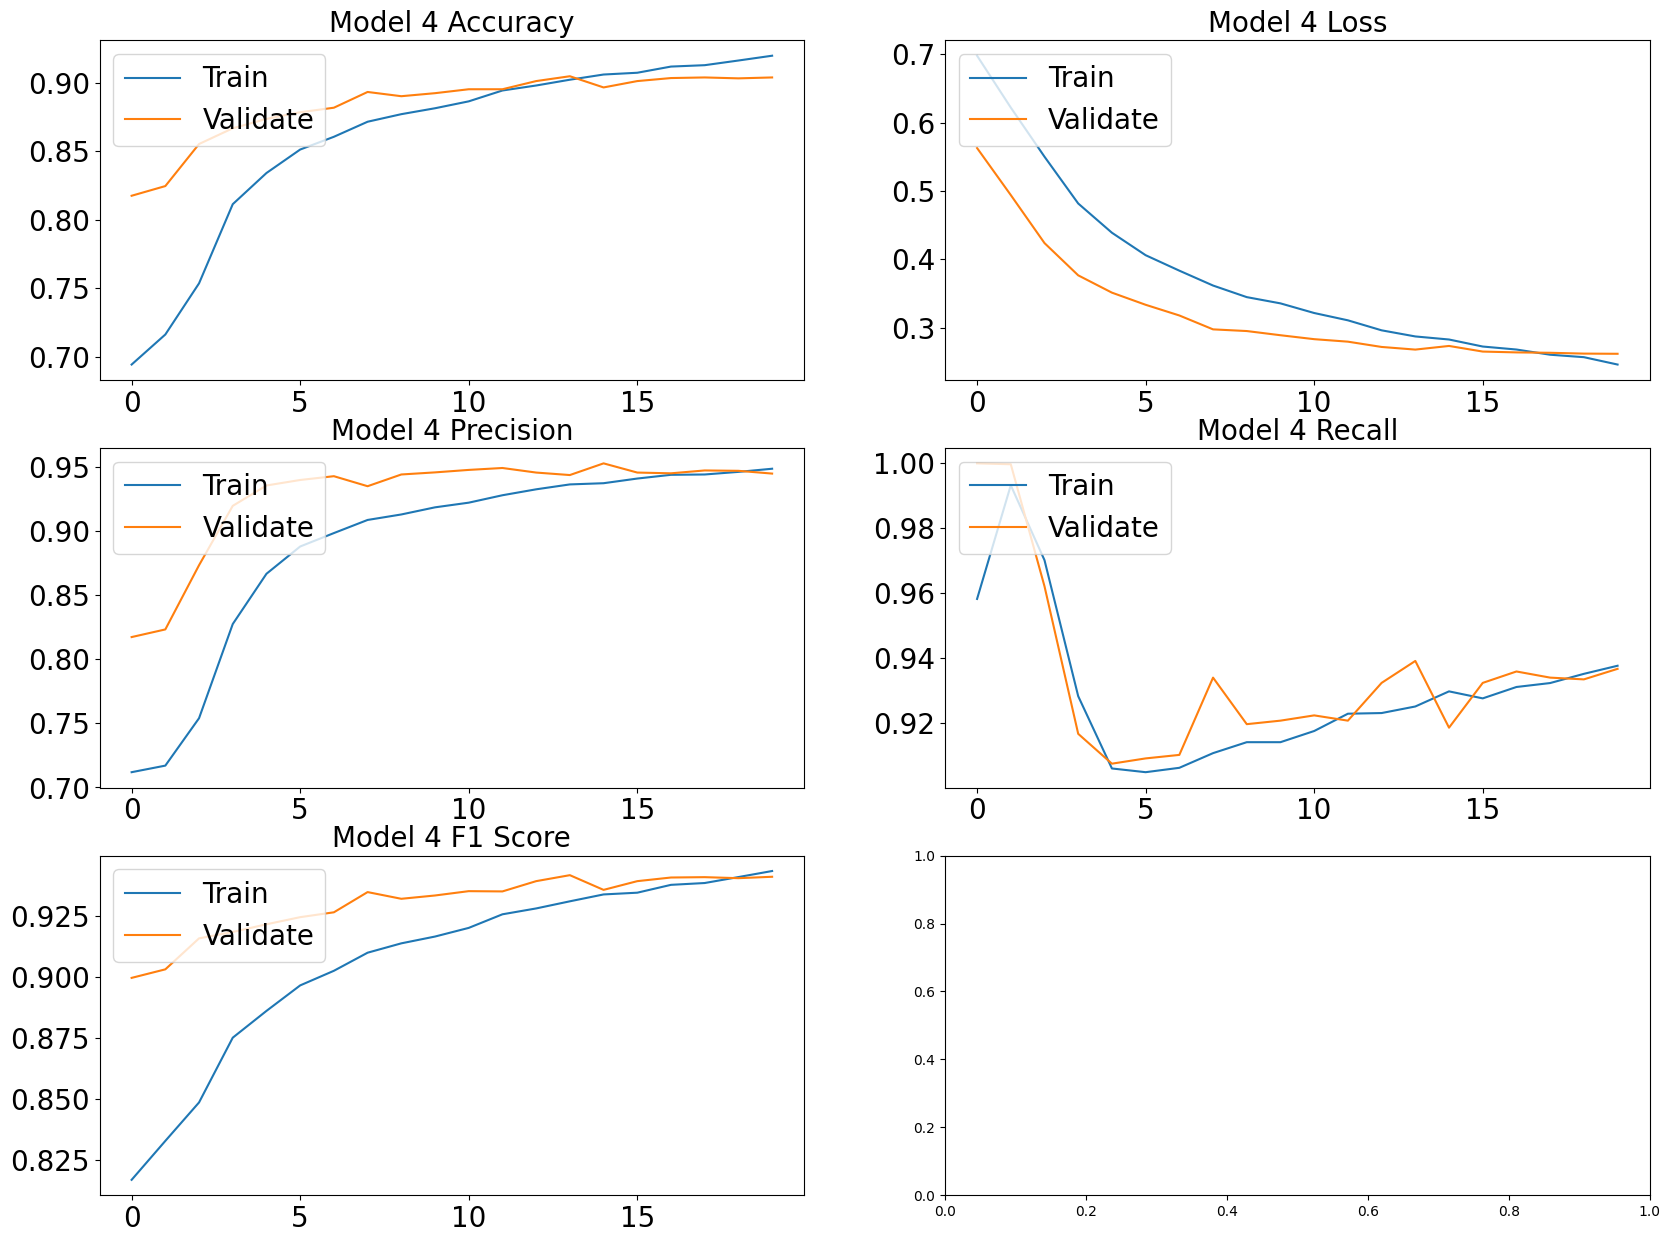

In [71]:
# Plot results
model4_val_accuracy, model4_val_precision, model4_val_recall ,model4_val_f1_scores = plot_results(history_model4,model_name='Model 4' )
print('model 4 accuracy', model4_val_accuracy)
print("model 4 precision", model4_val_precision)
print("model 4 recall",model4_val_recall)
print("model 4 f1 score",model4_val_f1_scores)

142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


<Figure size 100x100 with 0 Axes>

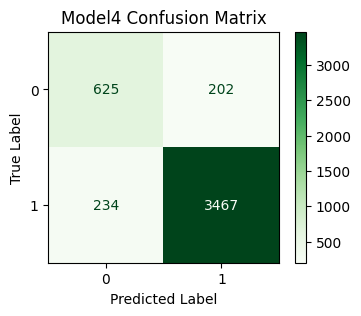

In [72]:
y_pred_model4=plot_cfm(model4,X=padded_test, y_actual= y_test, model_name='Model4')

In [73]:
#model  fp, fn samples
fp_fn_look(y_pred_model4)

****************************** Not recommended text predicted as recommended (False Positive) ***********************************
text3988
 bought top sale glad pay full price wash everyth wear dri saw greas spot back small hole one upper arm probabl abl take care greas spot hole littl trickier materi kind filmi love flaw 

text3719
 dress beauti color fabric super soft love would stun someon slim figur sinc ive got curvesan athlet build simpli work bad pretti dress curvi girl bewar 

****************************** Recommended Text predicted as not recommended (False Negative) ***********************************
text3410
 absolut ador dress plan onwear wed well made luxuri feel amaz even gorgeou person
text3182
 tunic cute incred comfort bit loos see model hang bodi lose waist littl bit think good substitut thin sweatshirt button detail neck nice want show littl cleavag cute comfort


#### ✍️ Model 4 Performance
- Unfortunately, incorporating GloVe embeddings doesn't help mitigate overfitting. The performance is quite similar to previous LSTM model when we look at the counts of incorrectly labeled testing samples. 
- I guess if I did lematization before embedding the model may work better because stemming sometimes change words to something embedding could hardly recognize.
- Also, recall there are lots of word unrecognized by glove embedding. One reason can be that the Glove embedding I use is small. Note there are different version. Unfortunately I cannot use a bigger embedding file here because of the RAM limitation.



## All Models' Comparison Chart

            Model 1   Model 2   Model 3   Model 4
Metric                                           
Accuracy   0.909011  0.906581  0.900398  0.903710
Precision  0.934249  0.934979  0.938478  0.944944
Recall     0.955958  0.951905  0.939746  0.936774
F1 Score   0.944979  0.943366  0.939112  0.940841


<Figure size 1000x500 with 0 Axes>

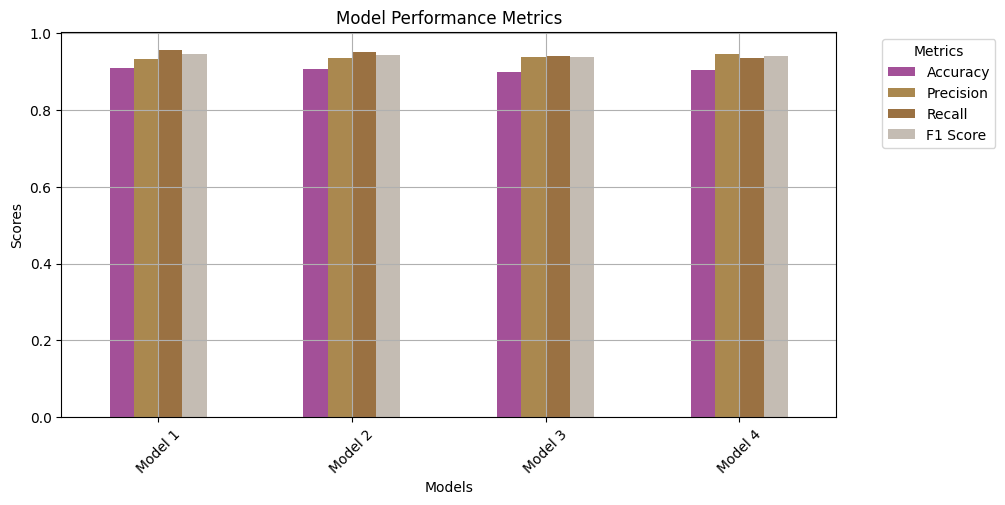

In [74]:
# Models' summary
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Model 1": [model1_val_accuracy, model1_val_precision, model1_val_recall, model1_val_f1_scores],
    "Model 2": [model2_val_accuracy, model2_val_precision, model2_val_recall, model2_val_f1_scores],
    "Model 3": [model3_val_accuracy, model3_val_precision, model3_val_recall, model3_val_f1_scores],
    "Model 4": [model4_val_accuracy, model4_val_precision, model4_val_recall, model4_val_f1_scores]
 
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index("Metric", inplace=True)
print(metrics_df)


# Plot the data
colors = ['#a35098', '#aa884f','#9a7142','#c4bcb3']
plt.figure(figsize=(10, 5))
metrics_df.T.plot(kind='bar', figsize=(10,5), color=colors)

plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# <a id="23"></a>
<div style="text-align: center; background-color: #877969; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 5: Conclusion 🧥</h1>

</div>

<div style="background-color: #f4f4f4; padding: 10px;">
<span style="font-size: larger; color: black;">
    
### Modeling Summary:
In this notebook, we've tried different deep learning models to predict if a review result in recommendation of a product or not:
- Model 1: Simple Dense Layers with TensorFlow Built-in Embedding:
    - We started with a straightforward architecture using only dense layers and TensorFlow's built-in embeddings. For this structure, fewer layers and shorter training duration yielded better results. Simpler models with dropout layers to prevent overfitting performed the best. However, the model struggled with imbalanced predictions, showing a disparity between false positives and false negatives due to the imbalance in the target variable.
    
- Model 2: Upsampling the Minority Class
  - To address the imbalance in prediction results, we upsampled the minority class (negative recommendations). This approach led to increased overfitting, so we reduced the training duration. While the imbalance in predictions improved, it primarily shifted false positives to false negatives without overall performance gains. Metrics like F1 score and accuracy remained similar to Model 1. 
    
- Model 3: LSTM for Sequence Learning
  - We introduced LSTM layers to allow the model to learn from sequences.
Unfortunately, this model was highly prone to overfitting, likely due to the increased complexity of LSTM and the small, imbalanced dataset. The overfitting issue was exacerbated in this setup.

- Model 4: LSTM with GloVe Embedding
  - To mitigate overfitting in the LSTM model, we incorporated GloVe embeddings.
Unfortunately, due to memory reason, we use a small GloVe embeddings, which didn't help reduce overfitting too much. There are too many words that Glvoe embedding won't recognize. I guess lemmatization might help but had some issues implement it. 
    


### Key Learnings and Take-Aways:
- Handling Imbalanced Target Variables:
   - Resampling techniques, such as upsampling the minority class, can help achieve more balanced predictions. However, these methods must be applied with caution to avoid overfitting, which can occur when duplicates are introduced into the dataset.
    
- Model Complexity and Data Size:
  - For small and imbalanced datasets, simpler models may outperform more complex ones. This is because complex models, such as deep neural networks, are prone to overfitting when there is limited data. In such cases, reducing the model's complexity can lead to better generalization and performance.

- Limitations of LSTM Models:
  - While Long Short-Term Memory (LSTM) networks are powerful for sequence learning, they can be too complex and prone to overfitting, particularly with small datasets. Simpler models may provide better results in these scenarios.

- Different Version of GloVe Embeddings:
  - Different versions of GloVe embeddings vary in their effectiveness due to factors such as corpus size, data quality, embedding dimensionality, and vocabulary coverage. Larger, higher-quality corpora tend to produce better embeddings with broader semantic coverage. So, with limitation of computer resouces, Glove embedding might not be too helpful.
    
### Future Improvements:
- Enhanced Corpus Cleaning: To boost prediction accuracy for text data, refining corpus cleaning methods is crucial. This involves expanding informal abbreviations, rectifying slang and typos, and grouping related words. Lemmatization stands out as a promising technique despite encountering some initial challenges. It addresses the issue of many words being unrecognizable by GloVe embedding, potentially enhancing model performance. Though time-consuming, these efforts are expected to substantially enhance prediction quality.
    
- Exploration of other Models and Structures: Exploring simpler and potentially more efficient neural network structures such as Gated Recurrent Units (GRUs) could offer comparable performance to LSTM with reduced complexity. Additionally, considering traditional machine learning models like logistic regression, decision trees, and SVMs can be beneficial, especially when incorporating non-text features.

- Exploration of Advanced Embedding Techniques: Using different embedding techniques can enhance model performance. TF-IDF provides a traditional but effective text representation, while BERT offers state-of-the-art contextual embeddings. Word2Vec, known for capturing semantic relationships, can also be considered. Comparing these techniques systematically will help identify the most effective one for the specific dataset and task.

- Advanced Preprocessing and Feature Engineering: Developing a custom stop words list, including bi-grams and tri-grams, and implementing domain-specific tokenization can capture more contextual information and nuances of the text data, leading to better model performance.


<a id="24"></a>
# References
Some few really helpful notebooks inspired my work:

https://www.kaggle.com/code/wonduk/eda-lstm-classification-on-clothing-reviews

https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-for-glove-part1-eda

https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-for-glove-part2-usage